In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['seed-from-uci', 'seeds-width-length', 'fishdata', 'wineuci', 'wikipediavectors']


# Clustering for dataset exploration
**Definition**

Unsupervised learning is all about finding patterns in the data.  
Ex: Clustering Customers by their purchases , Compressing the data using purchase pattern (dimentionality reduction)

**Difference between Supervised and Unsupervised Learning**

Supervised learning finds the pattern for a prediction task , unsupervised learning find patterns but without specific prediction in mind.

**Datasets used**
Iris


**K Means Clustering**
Finds clusters of samples  
Number of clusters must be specified in advance.

New samples can be assigned to existing cluster  
K means remembers the mean of each cluster (Cluster Centroids)  
Finds the nearest centroid for each new sample

In [2]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
iris=load_iris()
samples=iris.data
model=KMeans(n_clusters=3)
model.fit(samples)
labels=model.predict(samples)
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


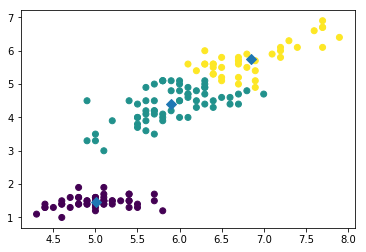

In [4]:
# plotting sepal length and petal length
xs=samples[:,0]
ys=samples[:,2]
plt.scatter(xs,ys,c=labels)
centroids=model.cluster_centers_
centroids_x=centroids[:,0]
centroids_y=centroids[:,2]
plt.scatter(centroids_x,centroids_y,marker='D',s=50)
plt.show()

**Evaluating a Cluster**
**Inertia measures cluster quality**
Measures how spread the clusters are , the lower the better
Distance from each sample to centroid of its cluster
After fit available as attribute inertia_
k means attemps to minimize the inertia when choosing the clusters

**The number of clusters**
More clusters means lower inertia ,
A good clustering has tight clusters , so low inertia
but not too many clusters
Choose an elbow in the inertia plot , where inertia begins to decrease more slowly








**Analysing seeds data from UCI**

In [5]:
seeds=pd.read_csv('../input/seed-from-uci/Seed_Data.csv')
seeds.head()

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [6]:
seed_dict={
    0:'Kama',
    1:'Rosa',
    2:'Canadian'
}
seed_list=seeds['target'].map(seed_dict).tolist()


In [7]:
# Preparing seeds for clustering by dropping the target column

seeds=seeds.drop(['target'],axis=1)
seeds.head()

,A,P,C,LK,WK,A_Coef,LKG
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


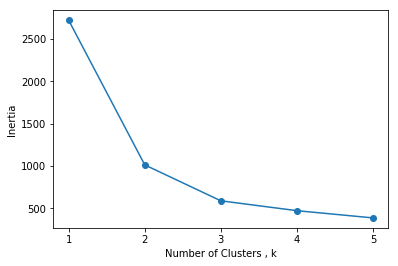

In [8]:
ks=range(1,6)
inertias=[]

for k in ks:
    model=KMeans(n_clusters=k)
    model.fit(seeds)
    inertias.append(model.inertia_)

plt.plot(ks,inertias,'-o')
plt.xlabel('Number of Clusters , k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

# Inertia decreases from 3 to 4 very slowly , so 3 can be a good choice

In [9]:
seeds.head()

,A,P,C,LK,WK,A_Coef,LKG
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [10]:
model=KMeans(n_clusters=3)
seed_labels=model.fit_predict(seeds)
centroids=model.cluster_centers_
centroids



array([[14.64847222, 14.46041667,  0.87916667,  5.56377778,  3.27790278,
         2.64893333,  5.19231944],
       [18.72180328, 16.29737705,  0.88508689,  6.20893443,  3.72267213,
         3.60359016,  6.06609836],
       [11.96441558, 13.27480519,  0.8522    ,  5.22928571,  2.87292208,
         4.75974026,  5.08851948]])

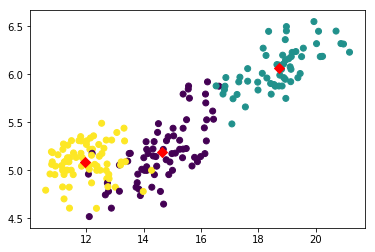

In [11]:
# A vs LKG
xs_A=seeds.iloc[:,0]
ys_LKG=seeds.iloc[:,-1]
centroids_xs_A=centroids[:,0]
centroids_ys_LKG=centroids[:,-1]
plt.scatter(xs_A,ys_LKG,c=seed_labels)
plt.scatter(centroids_xs_A,centroids_ys_LKG,marker='D',s=50,c='red')
plt.show()

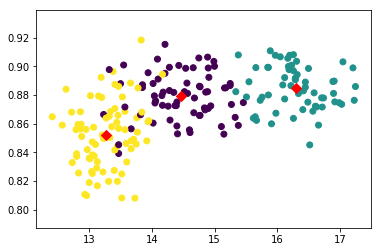

In [12]:
# P vs C
xs_A=seeds.iloc[:,1]
ys_LKG=seeds.iloc[:,2]
centroids_xs_A=centroids[:,1]
centroids_ys_LKG=centroids[:,2]
plt.scatter(xs_A,ys_LKG,c=seed_labels)
plt.scatter(centroids_xs_A,centroids_ys_LKG,marker='D',s=50,c='red')
plt.show()

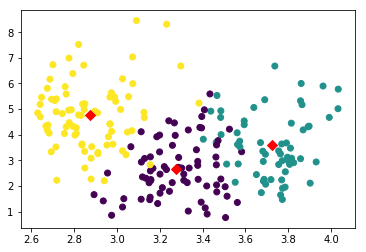

In [13]:
# WK vs A_Coeff
xs_A=seeds.iloc[:,4]
ys_LKG=seeds.iloc[:,5]
centroids_xs_A=centroids[:,4]
centroids_ys_LKG=centroids[:,5]
plt.scatter(xs_A,ys_LKG,c=seed_labels)
plt.scatter(centroids_xs_A,centroids_ys_LKG,marker='D',s=50,c='red')
plt.show()

**Tranforming Features for Better Clustering**


Piedmont wine Dataset


In [14]:
wine=pd.read_csv('../input/wineuci/Wine.csv',header=None)
wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [15]:
wine.columns=['Class','Alcohol','Malic_acid','Ash','Alcalinity_of_ash','Magnesium','Total_phenols','Flavanoids','Nonflavanoid_phenols','Proanthocyanins','Color_intensity','Hue','OD280','Proline']          

In [16]:
wine.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [17]:
wine_class=wine['Class']
wine.drop('Class',axis=1,inplace=True)

In [18]:
model=KMeans(n_clusters=3)
labels=model.fit_predict(wine)

df=pd.DataFrame({'labels':labels , 'class':wine_class})
ct=pd.crosstab(df['labels'],df['class'])
ct

class,1,2,3
labels,,,
0,13,20,29
1,0,50,19
2,46,1,0


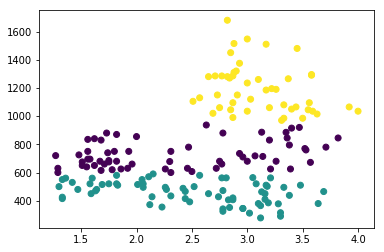

In [19]:
xs=wine.loc[:,'OD280']
ys=wine.loc[:,'Proline']
plt.scatter(xs,ys,c=labels)

 Feature Variances
 The wine features have very different variances (spread of its values)
 Hence the cross tabulation results has loose clusters (too many values overlapping). Example Cluster labeled 2 , has all the three class of Wines in it.

In [20]:
wine.var(axis=0)

Alcohol                     0.659062
Malic_acid                  1.248015
Ash                         0.075265
Alcalinity_of_ash          11.152686
Magnesium                 203.989335
Total_phenols               0.391690
Flavanoids                  0.997719
Nonflavanoid_phenols        0.015489
Proanthocyanins             0.327595
Color_intensity             5.374449
Hue                         0.052245
OD280                       0.504086
Proline                 99166.717355
dtype: float64

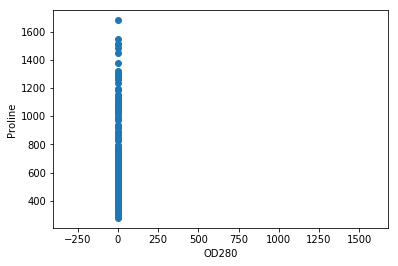

In [21]:
# Variance comparison between Proline and OD280
plt.scatter(wine['OD280'],wine['Proline'])
plt.xlim(-400,max(wine['Proline']))
plt.xlabel('OD280')
plt.ylabel('Proline')
plt.show()

**Applying Standard Scaler (then KMeans in sklearn Pipeline)**

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
scaler=StandardScaler()
kmeans=KMeans(n_clusters=3)
pipeline=make_pipeline(scaler,kmeans)
pipeline.fit(wine)
labels=pipeline.predict(wine)


In [23]:
df=pd.DataFrame({'labels':labels,'class':wine_class   }) 
ct=pd.crosstab(df['labels'],df['class'])
ct
# After scaling we get tight clusters

class,1,2,3
labels,,,
0,0,65,0
1,59,3,0
2,0,3,48


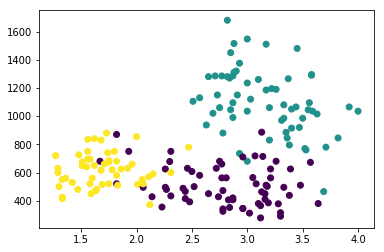

In [24]:
xs=wine.loc[:,'OD280']
ys=wine.loc[:,'Proline']
plt.scatter(xs,ys,c=labels)

**Scaling without pipeline**

In [25]:
scaled_wine=scaler.fit_transform(wine)
scaled_wine.var(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [26]:
scaled_wine=pd.DataFrame(scaled_wine)
scaled_wine.columns=['Alcohol','Malic_acid','Ash','Alcalinity_of_ash','Magnesium','Total_phenols','Flavanoids','Nonflavanoid_phenols','Proanthocyanins','Color_intensity','Hue','OD280','Proline']          

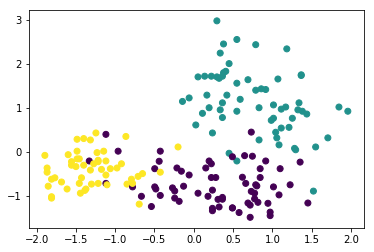

In [27]:
lables=KMeans(n_clusters=3).fit_predict(scaled_wine)
xs=scaled_wine.loc[:,'OD280']
ys=scaled_wine.loc[:,'Proline']
plt.scatter(xs,ys,c=labels)


# Visualization with hierarchical clustering and t-SNE
**Hierarchical Clustering**

In [28]:
from scipy.cluster.hierarchy import linkage,dendrogram , fcluster


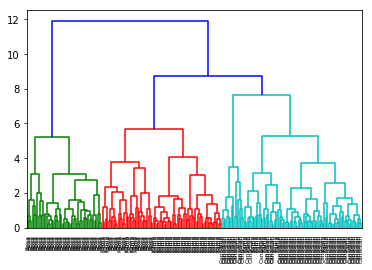

In [29]:
mergings=linkage(seeds,method='complete')
#plt.figure(figsize=(50,50))
dendrogram(mergings,labels=seed_list,leaf_rotation=90,leaf_font_size=6)
plt.show()



**Cluster Labels in Hierarchical Clustering**
Cluster labels at any intermediate stage can be recovered
Then they can be used in cross tabulation
Height can be used to extract intermediate clusters
Height on the dendrogram is the distance between merging clusters

**Distance Between Clusters**
Defined by linkage method
Specified via method parameter
'complete' means distance between clusters is maximum distance between their samples

**Extraxcting Cluster Labels**
Use the fcluster method
Returns numpy array of cluster labels



In [30]:
labels=fcluster(mergings,6,criterion='distance')
print(labels)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 2 4 2 2 2 4 2 2 4 4 2 2 4 2 2 2 2 2 2
 2 2 3 4 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 4 4 4 4 4 2 2 2 4 2 2 2 1
 2 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 2 1 2 1 1 1 1 2 1 1 2 2 2 2 2 2 2 2 4 3 3 4 4 3 4 4
 4 4 4 3 4 4 4 3 4 4 4 4 4 4 4 4 3 4 4 4 4 4 3 3 4 4 4 4 4 4 3 4 4 4 4 4 3
 4 4 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 4 4 3 4 4]


In [31]:
df=pd.DataFrame({'labels':labels,
             'seed_variety':seed_list})

ct=pd.crosstab(df['labels'],df['seed_variety'])
ct

seed_variety,Canadian,Kama,Rosa
labels,,,
1,0,0,47
2,0,52,23
3,13,1,0
4,57,17,0


** t-SNE for 2- dimentional maps **
t distributed stochastic neighbor embedding
Maps samples to 2D or 3D space
Map approximately preserves nearness of samples
Great for inspecting datasets

**t-SNE on iris data**
Iris samples are 4D
t-SNE maps samples to 2D space

**Interpreting t-SNE scatter plots**
'versicolor' and 'virginica' harder to distinguish
Consistent with intertia plot from KMeans (both 2 and 3 clusters can be viewed)

**t SNE in sklearn**
It has a fit_transform method , no separate fit and transform methods exist.Cant extend the map to new data.
Learning rate should be carefully chosen , wrong choice can bunch points together , values between 50 and 200 can be chosen.
t sne features are different every time , running again gives a different scatter plot , although the relative position of clusters remain the same.






In [32]:
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE
iris=load_iris()
data=iris.data
species=iris.target

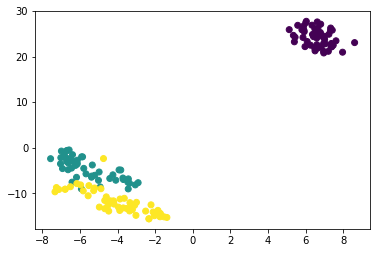

In [33]:
import seaborn as sns
model=TSNE(learning_rate=100)
transformed=model.fit_transform(data)
xs=transformed[:,0]
ys=transformed[:,1]
plt.scatter(xs,ys,c=species)
#plt.legend(species)
#sns.scatterplot(xs,ys,hue=species)
plt.show()

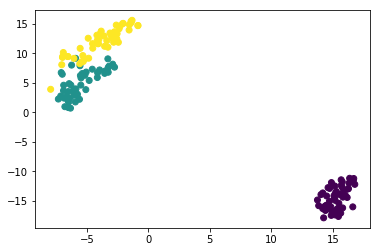

In [34]:
model=TSNE(learning_rate=100)
transformed=model.fit_transform(data)
xs=transformed[:,0]
ys=transformed[:,1]
plt.scatter(xs,ys,c=species)
#plt.legend(species)
#sns.scatterplot(xs,ys,hue=species)
plt.show()

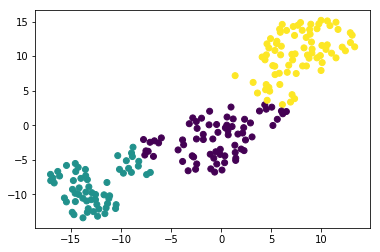

In [35]:
# TSNE on Seed Data

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(seeds)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs,ys,c=seed_labels)
plt.show()

# the t-SNE visualization manages to separate the 3 varieties of grain samples.
# Annotate the points
# for x, y, seedlabel in zip(xs, ys, seed_labels):
#     plt.annotate(seedlabel, (x, y), fontsize=5, alpha=0.75)


# Decorrelating your data and dimension reduction
Dimension reduction summarizes a dataset using its common occuring patterns. In this section, you'll learn about the most fundamental of dimension reduction techniques, "Principal Component Analysis" ("PCA"). PCA is often used before supervised learning to improve model performance and generalization. It can also be useful for unsupervised learning. For example, you'll employ a variant of PCA will allow you to cluster Wikipedia articles by their content!



**Visualizing the PCA Transformation**
**Dimension Reduction**
Removes less informative noise features
**Principal Component Analysis**
Fundamental Dimension Reduction Technique
First step is 'decorrealtion' second is 'reducing dimension'
**PCA aligns data with axes**
Rotates data samples to be aligned with axes
Shifts data samples so they have mean 0
No information is lost
PCA follows the fit/transform pattern

**PCA Features**
Rows of tranformed corresponds to samples
columns are PCA features
Features of the data are correlated but but PCA Features are not linearly correlated.

**Principal Components**
Principal components is the 'direction of variance'
PCA Aligns principal componenets with the axes
Available as components_ attribute of PCA object
Each row defines displacement from mean




In [36]:
# WINE DATA
# Samples contain two wine features 
samples=wine[['Total_phenols','OD280']]
from sklearn.decomposition import PCA
model=PCA()
model.fit(samples)
transformed=model.transform(samples)
print(model.components_)
transformed[:10]

[[-0.64116665 -0.76740167]
 [-0.76740167  0.64116665]]


array([[-1.32771994,  0.45139607],
       [-0.83249607,  0.23309966],
       [-0.75216868, -0.02947892],
       [-1.64026613, -0.65572401],
       [-0.56799228, -0.18335891],
       [-0.80794847, -0.59533103],
       [-0.87445337,  0.46361991],
       [-0.93857004,  0.38687974],
       [-0.50660014, -0.23465224],
       [-1.15919131,  0.07603211]])

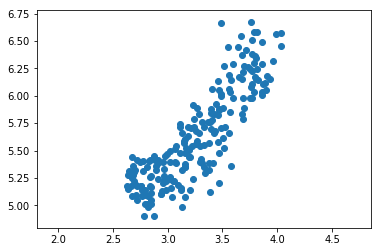

0.8604149377143466


'\nAs you would expect, the width and length of the grain samples are highly correlated.\nPearson Correlation is 0.86\n\n'

In [37]:
# Seeds width length Data
grains=pd.read_csv('../input/seeds-width-length/seeds-width-vs-length.csv',header=None)

from scipy.stats import pearsonr

width = grains.iloc[:,0]
length = grains.iloc[:,1]

# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width,length)

# Display the correlation
print(correlation)
'''
As you would expect, the width and length of the grain samples are highly correlated.
Pearson Correlation is 0.86

'''

**Decorrelating the grain measurements with PCA**
You observed in the previous exercise that the width and length measurements of the grain are correlated. Now, you'll use PCA to decorrelate these measurements, then plot the decorrelated points and measure their Pearson correlation.

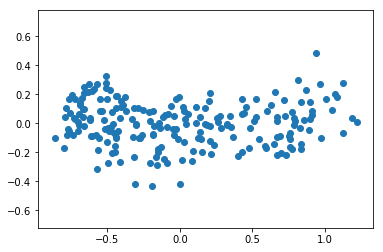

2.5478751053409354e-17


"\nWe've successfully decorrelated the grain measurements with PCA!\n"

In [38]:
model = PCA()
# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains)
# Assign 0th column of pca_features: xs
xs = pca_features[:,0]
# Assign 1st column of pca_features: ys
ys = pca_features[:,1]
# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)
# Display the correlation
print(correlation)

'''
We've successfully decorrelated the grain measurements with PCA!
'''

**Intrinsic dimensions**
Intrinsic dimension is the number of features needed to approximate the dataset
It is the essential idea behind dimension reduction
Intrinsic dimention = number of PCA Features with significant variance


(2.549993369175627, 4.113006630824374, 4.795023399558499, 6.778976600441501)

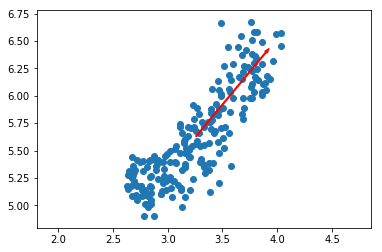

In [39]:
# Make a scatter plot of the untransformed points
plt.scatter(grains.iloc[:,0],grains.iloc[:,1])


model=PCA()
model.fit(grains)
# the coordinates of the mean of the data 
mean=model.mean_
# Get the first principal component: first_pc Data varies the most along this direction
first_pc = model.components_[0]
# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')

In [40]:
# FISH DATA
fish=pd.read_csv("../input/fishdata/fish.csv", header=None).drop([0],axis=1)
fish.head()

,1,2,3,4,5,6
0,242.0,23.2,25.4,30.0,38.4,13.4
1,290.0,24.0,26.3,31.2,40.0,13.8
2,340.0,23.9,26.5,31.1,39.8,15.1
3,363.0,26.3,29.0,33.5,38.0,13.3
4,430.0,26.5,29.0,34.0,36.6,15.1


In [41]:
fish.var()

1    145110.683403
2       127.451689
3       148.475328
4       174.168524
5       107.154440
6         4.483703
dtype: float64

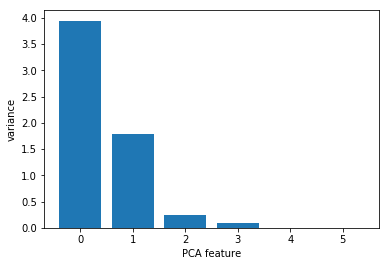

'\nIt looks like PCA features 0 and 1 have significant variance.\nSince PCA features 0 and 1 have significant variance, the intrinsic dimension of this dataset appears to be 2.\n'

In [42]:
scaler=StandardScaler()
pca=PCA()
pipeline=make_pipeline(scaler,pca)
pipeline.fit(fish)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()
'''
It looks like PCA features 0 and 1 have significant variance.
Since PCA features 0 and 1 have significant variance, the intrinsic dimension of this dataset appears to be 2.
'''

**Dimension Reduction with PCA**
Dimension reduction of the fish measurements
In a previous exercise, you saw that 2 was a reasonable choice for the "intrinsic dimension" of the fish measurements. Now use PCA for dimensionality reduction of the fish measurements, retaining only the 2 most important components.

In [43]:
scaler=StandardScaler()
scaled_fish=scaler.fit_transform(fish)

pca=PCA(n_components=2)
pca_features=pca.fit_transform(scaled_fish)
pca_features.shape
'''
Successfully reduced the dimensionality from 6 to 2.

'''

'\nSuccessfully reduced the dimensionality from 6 to 2.\n\n'

In [44]:
# # Perform the necessary imports
# from sklearn.decomposition import TruncatedSVD

# # Create a TruncatedSVD instance: svd
# svd = TruncatedSVD(n_components=50)

# # Create a KMeans instance: kmeans
# kmeans = KMeans(n_clusters=6)

# # Create a pipeline: pipeline
# pipeline = make_pipeline(svd,kmeans)

# # Import pandas
# import pandas as pd

# # Fit the pipeline to articles
# pipeline.fit(articles)

# # Calculate the cluster labels: labels
# labels = pipeline.predict(articles)

# # Create a DataFrame aligning labels and titles: df
# df = pd.DataFrame({'label': labels, 'article': titles})

# # Display df sorted by cluster label
# print(df.sort_values('label'))


# Discovering interpretable features
In this chapter, you'll learn about a dimension reduction technique called "Non-negative matrix factorization" ("NMF") that expresses samples as combinations of interpretable parts. For example, it expresses documents as combinations of topics, and images in terms of commonly occurring visual patterns. You'll also learn to use NMF to build recommender systems that can find you similar articles to read, or musical artists that match your listening history!

## Non-negative matrix factorization
NMF is non negative matrix factorization  
Dimension reduction technique  
NMF models are interpretable unlike PCA  
All features must be non negative  

## Using scikit-learn NMF
Follows fit transfrom pattern  
must specify number of components  
works with numpy array and with csr_matrix

## NMF components
NMF has components just like PCA has principal components
Dimension of components = dimension of samples  
Entries are non negative  
 
## NMF features
NMF Feature values are non negative  
Can be used to reconstruct the samples , combine feature values with components

## Sample reconstruction
Multiply feature values with components and add up
Sample can be expressed as the product of matrices hence the term Matrix Factorization  



In [45]:
from scipy.sparse import csr_matrix

df=pd.read_csv('../input/wikipediavectors/wikipedia-vectors.csv',index_col=0)
print('Shape of Wiki vector :{}'.format(df.shape))

'''
The wikipedia vector file has tf-idf entries for 13125 words covering 60 topics
'''
df.head(3)

Shape of Wiki vector :(13125, 60)


,HTTP 404,Alexa Internet,Internet Explorer,HTTP cookie,Google Search,Tumblr,Hypertext Transfer Protocol,Social search,Firefox,LinkedIn,Global warming,Nationally Appropriate Mitigation Action,Nigel Lawson,Connie Hedegaard,Climate change,Kyoto Protocol,350.org,Greenhouse gas emissions by the United States,2010 United Nations Climate Change Conference,2007 United Nations Climate Change Conference,Angelina Jolie,Michael Fassbender,Denzel Washington,Catherine Zeta-Jones,Jessica Biel,Russell Crowe,Mila Kunis,Dakota Fanning,Anne Hathaway,Jennifer Aniston,France national football team,Cristiano Ronaldo,Arsenal F.C.,Radamel Falcao,Zlatan Ibrahimović,Colombia national football team,2014 FIFA World Cup qualification,Football,Neymar,Franck Ribéry,Tonsillitis,Hepatitis B,Doxycycline,Leukemia,Gout,Hepatitis C,Prednisone,Fever,Gabapentin,Lymphoma,Chad Kroeger,Nate Ruess,The Wanted,Stevie Nicks,Arctic Monkeys,Black Sabbath,Skrillex,Red Hot Chili Peppers,Sepsis,Adam Levine
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.020076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.008878,0.0,0.0,0.049502,0.0,0.00000,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00611,0.0
2,0.0,0.029607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017294,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007054,0.006915,0.0,0.014745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020774,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.0


In [46]:
words=['aaron','abandon','abandoned','abandoning','abandonment','abbas','abbey','abbreviated','abbreviation','abc','abdomen','abdominal','abdul','abel','abilities','ability','able','abnormal','abnormalities','abnormally','aboard','abolish','abolished','abolishing','abolition','aboriginal','abortion','abraham','abroad','abrupt','abruptly','absence','absent','absolute','absolutely','absorb','absorbed','absorbing','absorbs','absorption','abstract','abstraction','absurd','abu','abundance','abundant','abuse','abused','abuses','abusive','academia','academic','academics','academies','academy','accelerate','accelerated','accelerating','acceleration','accent','accents','accept','acceptable','acceptance','accepted','accepting','accepts','access','accessed','accessible','accessing','accession','accessories','accessory','accident','accidental','accidentally','accidents','acclaim','acclaimed','accolades','accommodate','accompanied','accompaniment','accompany','accompanying','accomplish','accomplished','accomplishment','accomplishments','accord','accordance','according','accordingly','account','accountability','accountable','accounted','accounting','accounts','accredited','accumulate','accumulated','accumulation','accuracy','accurate','accurately','accusation','accusations','accused','accusing','ace','achieve','achieved','achievement','achievements','achieves','achieving','acid','acidic','acids','acknowledge','acknowledged','acknowledges','acknowledging','acoustic','acquaintance','acquainted','acquire','acquired','acquiring','acquisition','acquisitions','acquitted','acre','acres','acronym','act','acted','acting','action','actions','activate','activated','activates','activation','active','actively','activism','activist','activists','activities','activity','actor','actors','actress','actresses','acts','actual','actually','acute','adam','adams','adapt','adaptation','adaptations','adapted','adapting','adaption','adaptive','add','added','addicted','addiction','adding','addition','additional','additionally','additions','additive','address','addressed','addresses','addressing','adds','adept','adequate','adequately','adhere','adhered','adherence','adherents','adjacent','adjective','adjoining','adjust','adjusted','adjusting','adjustment','adjustments','administer','administered','administering','administration','administrations','administrative','administrator','administrators','admiral','admiration','admired','admission','admissions','admit','admits','admitted','admitting','adolescence','adolescent','adolescents','adolf','adopt','adopted','adopting','adoption','adrian','ads','adult','adultery','adulthood','adults','advance','advanced','advancement','advances','advancing','advantage','advantageous','advantages','advent','adventure','adventures','adversary','adverse','adversely','advertise','advertised','advertisement','advertisements','advertising','advice','advise','advised','adviser','advisers','advises','advising','advisor','advisors','advisory','advocacy','advocate','advocated','advocates','advocating','aerial','aerospace','aesthetic','aesthetics','affair','affairs','affect','affected','affecting','affection','affects','affiliate','affiliated','affiliates','affiliation','affinity','affirmative','affirmed','afflicted','affluent','afford','affordable','afforded','afghan','afghanistan','aforementioned','afraid','africa','african','africans','afro','afterlife','aftermath','afternoon','afterward','age','aged','agencies','agency','agenda','agent','agents','ages','aggravated','aggregate','aggregator','aggression','aggressive','aggressively','aging','agitation','agnostic','ago','agrarian','agree','agreed','agreeing','agreement','agreements','agrees','agricultural','agriculture','ahead','ahmad','ahmed','aid','aide','aided','aides','aiding','aids','ailments','aim','aimed','aiming','aims','ain','air','airborne','aircraft','aired','airing','airline','airlines','airplane','airplanes','airplay','airport','airports','airs','airways','ajax','aka','akin','alabama','alan','alarm','alaska','albania','albeit','albert','alberto','album','albums','alcohol','alcoholic','alcoholism','alec','alert','alex','alexander','alexandra','alexandre','alexandria','alexis','alfred','algae','algeria','algorithm','algorithms','ali','alias','alice','alicia','alien','alienated','alienation','aliens','align','aligned','alignment','alike','alive','allan','allegation','allegations','alleged','allegedly','allegiance','alleging','allegory','allen','allergic','alleviate','alley','alliance','alliances','allied','allies','allmusic','allocated','allocation','allow','allowance','allowed','allowing','allows','alloy','allusions','ally','alma','alongside','alpha','alphabet','alpine','alps','alt','altar','alter','alteration','alterations','altercation','altered','altering','alternate','alternately','alternating','alternative','alternatively','alternatives','altitude','altitudes','alto','altogether','aluminium','aluminum','alumni','amanda','amassed','amateur','amazing','amazon','ambassador','ambassadors','amber','ambient','ambiguity','ambiguous','ambition','ambitions','ambitious','ambulance','ambush','ambushed','amended','amendment','amendments','america','american','americans','americas','amid','amidst','amino','ammonia','ammunition','amnesty','amounted','amounting','amounts','amphibians','ample','amplification','amsterdam','amusement','amy','ana','anal','analog','analogous','analogue','analogy','analyses','analysis','analyst','analysts','analytical','analyze','analyzed','analyzing','anarchy','anatolia','anatomical','anatomy','ancestor','ancestors','ancestral','ancestry','anchor','anchored','ancient','anderson','andr','andrea','andrew','andrews','android','andy','anemia','angel','angela','angeles','angelo','angels','anger','angered','angle','angles','anglican','anglo','angola','angrily','angry','angular','animal','animals','animated','animation','anime','animosity','ankle','ann','anna','anne','annex','annexation','annexed','annie','anniversary','announce','announced','announcement','announcements','announcing','annual','annually','anonymous','anonymously','answer','answered','answering','answers','ant','antagonist','antagonists','antarctic','antarctica','anterior','anthem','anthology','anthony','anthropogenic','anthropologist','anthropology','anti','antibiotics','antibodies','anticipated','anticipation','antics','antiquity','antoine','anton','antonio','anus','anxiety','anxious','anybody','anymore','apache','apart','apartheid','apartment','apartments','apex','api','apocalypse','apocalyptic','apollo','apologize','apologized','apology','app','appalled','apparatus','apparel','apparent','apparently','appeal','appealed','appealing','appeals','appear','appearance','appearances','appeared','appearing','appears','appetite','applauded','applause','apple','apples','applicable','applicants','application','applications','applied','applies','apply','applying','appoint','appointed','appointing','appointment','appointments','appoints','appreciate','appreciated','appreciation','apprentice','approach','approached','approaches','approaching','appropriate','appropriately','approval','approve','approved','approving','approximate','approximately','approximation','apps','april','aquatic','arab','arabia','arabian','arabic','arable','arabs','arbitrarily','arbitrary','arbitration','arc','arcade','arch','archaeological','archaeologists','archaeology','archaic','archbishop','archer','archipelago','architect','architects','architectural','architecture','archive','archives','arctic','area','areas','aren','arena','arenas','argentina','argentine','arguably','argue','argued','argues','arguing','argument','arguments','arid','arise','arisen','arises','arising','aristocracy','aristocratic','aristocrats','aristotle','arithmetic','arizona','arkansas','arm','armed','armenia','armenian','armies','armistice','armor','armored','arms','armstrong','army','arnold','arose','arousal','aroused','arrange','arranged','arrangement','arrangements','arranging','array','arrest','arrested','arresting','arrests','arrival','arrivals','arrive','arrived','arrives','arriving','arrow','arrows','arsenal','art','arteries','artery','arthur','article','articles','articulated','artifacts','artificial','artificially','artillery','artisans','artist','artistic','artistry','artists','arts','artwork','aryan','ascended','ascertain','ascribed','ash','ashes','ashley','ashton','asia','asian','asians','asiatic','aside','ask','asked','asking','asks','asleep','aspect','aspects','aspirations','aspiring','ass','assassin','assassinate','assassinated','assassination','assassinations','assassins','assault','assaulted','assaults','assemble','assembled','assemblies','assembly','assert','asserted','asserting','assertion','assertions','asserts','assess','assessed','assessing','assessment','assessments','asset','assets','assign','assigned','assignment','assigns','assimilated','assimilation','assist','assistance','assistant','assistants','assisted','assisting','assists','associate','associated','associates','association','associations','assortment','assume','assumed','assumes','assuming','assumption','assumptions','assurance','assure','assured','asteroid','asthma','astonishing','astronaut','astronauts','astronomer','astronomers','astronomical','astronomy','asylum','ate','atheist','atheists','athens','athlete','athletes','athletic','athletics','atlanta','atlantic','atlas','atm','atmosphere','atmospheric','atom','atomic','atoms','atop','atp','atrocities','attach','attached','attachment','attack','attacked','attackers','attacking','attacks','attain','attained','attaining','attempt','attempted','attempting','attempts','attend','attendance','attendant','attended','attending','attends','attention','attested','attire','attitude','attitudes','attorney','attorneys','attract','attracted','attracting','attraction','attractions','attractive','attracts','attributable','attribute','attributed','attributes','attributing','atypical','auction','auctioned','audience','audiences','audio'
       ,'audition','auditioned','auditioning','auditions','auditorium','augmented','august','augustine','augustus','aunt','auspices','austin','australia','australian','australians',
    'austria','austrian','authentic','authentication','authenticity','author','authored','authorised','authoritarian','authorities','authority','authorization','authorized','authors',
    'authorship','autism','auto','autobiographical','autobiography','automated','automatic','automatically','automobile','automobiles','automotive','autonomous','autonomy','autopsy',
    'autumn','auxiliary','availability','available','avant','avatar','avenue','avenues','average','averaged','averages','averaging','aviation','avid','avoid','avoidance','avoided',
    'avoiding','avoids','awaiting','awakening','award','awarded','awards','aware','awareness','away','awful','awkward','axe','axis','azerbaijan','babies','baby','babylonian','bachelor',
    'backbone','backdrop','backed','background','backgrounds','backing','backlash','backs','backstage','backup','backward','backwards','bacon','bacteria','bacterial','bacterium','bad',
    'badge','badly','bafta','bag','baghdad','bags','bah','bahamas','bail','baked','baker','baking','balance','balanced','balances','balancing','bald','baldwin','bali','balkans','ball',
    'ballad','ballads','ballet','ballistic','ballot','balls','baltic','baltimore','bamboo','ban','banana','band','bands','bandwidth','bang','bangalore','bangladesh','bank','banker',
    'bankers','banking','bankrupt','bankruptcy','banks','banned','banner','banning','bans','baptised','baptism','baptist','baptized','bar','barack','barbara','barcelona','bare','barely','bargaining','barley','barnes','baron','baroque','barred','barrel','barrels','barrier','barriers','barry','bars','basal','base','baseball','based','baseline','basement','bases','basic','basically','basilica','basin','basins','basis','basket','basketball','bass','bassist','bat','batch','bath','bathing','bathroom','baths','batman','battalion','batteries','battery','battle','battlefield','battles','battling','bavaria','bay','bbc','bce','beach','beaches','beam','bean','beans','bear','beard','bearer','bearing','bears','beast','beat','beaten','beating','beatles','beats','beautiful','beauty','beck','bed','bedroom','beds','bee','beef','beer','befriended','began','begin','beginning','beginnings','begins','begun','behalf','behave','behaved','behavior','behavioral','behaviors','behaviour','behest','beijing','beings','bel','belarus','belgian','belgium','belief','beliefs','believe','believed','believer','believers','believes','believing','bell','belle','bells','belly','belong','belonged','belonging','belongs','beloved','belt','belts','ben','bench','bend','beneath','benedict','beneficial','benefit','benefited','benefiting','benefits','bengal','bengali','benign','benjamin','bennett','benny','bent','berkeley','berlin','bernard','berry','bertrand','besieged','best','bestowed','bestseller','bet','beta','betrayal','betrayed','better','betty','beverage','beverages','beverly','beyonc','bias','biased','bible','biblical','bibliography','bicameral','bicycle','bicycles','bid','bidding','big','bigger','biggest','bike','bilateral','bilingual','billboard','billed','billing','billion','billionaire','billions','bills','billy','bin','binary','bind','binding','binds','bing','bio','biochemical','biodiversity','biographer','biographers','biographical','biographies','biography','biological','biologically','biologist','biology','biomass','biomedical','biopic','biosphere','biotechnology','bipolar','birch','bird','birds','birmingham','birth','birthday','birthplace','births','bisexual','bishop','bishops','bit','bitch','bite','bites','biting','bits','bitter','bizarre','black','blacks','bladder','blade','blades','blair','blake','blame','blamed','blaming','blank','blast','bleeding','blend','blended','blending','blessed','blessing','blind','blindness','bloc','block','blockade','blockbuster','blocked','blocking','blocks','blog','blogs','blonde','blood','blooded','bloodstream','bloody','bloom','bloomberg','blow','blowing','blown','blows','blu','blue','blues','blunt','blurred','board','boarded','boarding','boards','boasted','boasts','boat','boats','bob','bobby','bodied','bodies','bodily','body','bodyguard','boeing','bohemian','boiled','boiling','bold','bolivia','bollywood','bolt','bomb','bombardment','bombed','bombers','bombing','bombings','bombs','bond','bonded','bonding','bonds','bone','bones','bonnie','bonus','book','booked','books','boom','boost','boosted','boot','booth','boots','border','bordered','bordering','borderline','borders','bore','bored','boris','born','borne','borough','borrow','borrowed','borrowing','bosnia','boss','boston','botanical','bottle','bottles','bought','boulevard','bounce','bound','boundaries','boundary','bounded','bounds','bounty','bourgeois','bout','bouts','bow','bowel','bowie','bowl','bowling','box','boxer','boxes','boxing','boy','boycott','boycotted','boyfriend','boyle','boys','brad','bradley','brain','brains','branch','branched','branches','brand','branded','branding','brandon','brands','brass','brave','bravery','brawl','brazil','brazilian','breach','bread','break','breakdown','breakfast','breaking','breakout','breaks','breakthrough','breakup','breast','breasts','breath','breathe','breathing','bred','breed','breeding','brian','brick','bricks','bride','bridge','bridges','brief','briefly','brien','brigade','bright','brighter','brilliant','bring','bringing','brings','bristol','brit','britain','british','britney','britons','broad','broadband','broadcast','broadcaster','broadcasters','broadcasting','broadcasts','broader','broadly','broadway','broke','broken','bronx','bronze','brooklyn','brooks','bros','brother','brotherhood','brothers','brought','brown','browser','browsers','browsing','bruce','bruno','brush','brussels','brutal','brutality','bryan','bryant','bubble','bubbles','buchanan','bud','buddha','buddhism','buddhist','buddhists','buddy','budget','budgets','buffalo','buffer','bug','bugs','build','builder','builders','building','buildings','builds','built','bulb','bulgaria','bulgarian','bulk','bull','bullet','bullets','bulls','bullying','bunch','bundled','bunny','burden','bureau','bureaucracy','burgeoning','burial','buried','burke','burma','burn','burned','burning','burns','burnt','burst','bursts','burton','bury','bus','buses','bush','busiest','business','businesses','businessman','businessmen','bust','busy','butler','butter','butterfly','button','buttons','buy','buyer','buyers','buying','buys','buzz','bypass','byzantine','cab','cabin','cabinet','cable','cables','caesar','caf','cafe','cage','cairo','cake','cakes','calcium','calculate','calculated','calculating','calculation','calculations','calendar','calf','caliber','california','called','calling','calls','calm','calories','calvin','cam','cambodia','cambridge','came','cameo','camera','cameras','cameron','camp','campaign','campaigned','campaigning','campaigns','campbell','camps','campus','campuses','canada','canadian','canadians','canal','canals','cancel','canceled','cancellation','cancelled','cancer','cancers','candidacy','candidate','candidates','candy','cane','cannabis','canned','cannes','cannon','canon','canonical','cans','canterbury','canyon','cap','capabilities','capability','capable','capacities','capacity','cape','capita','capital','capitalism','capitalist','capitals','capitol','capped','caps','captain','captive','captivity','capture','captured','captures','capturing','car','carbohydrate','carbohydrates','carbon','card','cardiac','cardinal','cardiovascular','cards','care','cared','career','careers','careful','carefully','carey','cargo','caribbean','caring','carl','carlo','carlos','carnegie','carnival','carol','carolina','caroline','carpenter','carpet','carr','carriage','carried','carrier','carriers','carries','carroll','carry','carrying','cars','carson','carter','cartoon','cartoonist','cartoons','carved','case','cases','casey','cash','casino','casket','caspian','cast','caste','casting','castle','castro','casts','casual','casualties','casualty','cat','catalog','catalogue','catalyst','catastrophe','catastrophic','catch','catches','catching','categories','categorized','category','cater','cathedral','catherine','catholic','catholicism','catholics','cats','cattle','caucasus','caught','causal','cause','caused','causes','causing','caution','cautious','cavalry','cave','caves','cavity','cbs','cds','cease','ceased','ceasefire','cecil','ceded','ceiling','celebrate','celebrated','celebrates','celebrating','celebration','celebrations','celebrities','celebrity','celestial','cell','cells','cellular','celtic','cement','cemented','cemetery','censored','censorship','census','cent','centennial','center','centered','centers','central','centralised','centralized','centrally','centre','centred','centres','centric','cents','centuries','century','ceo','ceramics','cereal','cereals','cerebral','ceremonial','ceremonies','ceremony','certain','certainly','certainty','certificate','certificates','certification','certified','cervical','cessation','cgi','chad','chain','chains','chair','chaired','chairman','chairs','challenge','challenged','challenger','challenges','challenging','chamber','chamberlain','chambers','champion','championed','champions','championship','championships','chan','chance','chancellor','chances','chandler','change','changed','changes','changing','channel','channels','chaos','chaotic','chapel','chapter','chapters','character','characterised','characteristic','characteristics','characterization','characterize','characterized','characters','charcoal','charge','charged','charges','charging','charisma','charismatic','charitable','charities','charity','charlemagne','charles','charleston','charlie','charlotte','charm','charming','chart','charted','charter','chartered','charting','charts','chase','chased','chasing','chat','cheap','cheaper','cheating','check','checked','checking','checks','cheek','cheese','chef','chelsea','chemical','chemically','chemicals','chemist','chemistry','chemists','chennai','cherry','chess','chest','chi','chicago','chicken','chickens','chief','chiefly','chiefs','child','childbirth','childhood','children','chile','chilean','chili','chin','china','chinese','chip','chips','chloride','chocolate','choice','choices','choir','cholera','cholesterol','choose','chooses','choosing','chopra','choreographer','chorus','chose','chosen','chris','christ','christian','christianity','christians','christie','christina','christine','christmas','christopher','chrome','chromosome','chromosomes','chronic','chronicle','chronicles','chronological','chuck','church','churches','churchill','cia','cigarette','cigarettes','cincinnati','cinema','cinemas','cinematic','circa','circle','circles','circuit','circuits','circular','circulated','circulating','circulation','circumstances','circus','citation','cite','cited','cites','cities','citing','citizen','citizens','citizenship','city','civic','civil','civilian','civilians','civilization','civilizations','clad','claim','claimed','claiming','claims','claire','clan','clandestine','clans','clara','clarence','clarified','clarify','clarity','clark','clarke','clarkson','clash','clashed','clashes','class','classed','classes','classic','classical','classically','classics','classification','classifications','classified','classify','classmate','classmates','classroom','claude','claudia','clause','clay','clean','cleaning','clear','clearance','cleared','clearing','clearly','clement','clergy','clerical','clerk','cleveland','clever','clich','click','client','clients','cliff','cliffs','climate','climates','climatic','climax','climb','climbed','climbing','clinic','clinical','clinically','clinics','clint','clinton','clip','clips','clock','close','closed','closely','closer','closest','closet','closing','closure','cloth','clothes','clothing','cloud','clouds','club','clubs','clue','clues','cluster','clusters','cnn','coach','coaches','coaching','coal','coalition','coast','coastal','coastline','coasts','coat','coated','coats','coca','cocaine','cocktail','cocoa','coconut','code','coded','codes','codice','codified','coding','coefficient','coffee','coffin','cognate','cognition','cognitive','cohen','coherent','coin','coincide','coincided','coincidence','coincidentally','coinciding','coined','coins','coke','col','cola','cold','colder','coldest','cole','coleman','colin','collaborate','collaborated','collaborating','collaboration','collaborations','collaborative','collaborator','collaborators','collapse','collapsed','collapsing','collar','colleague','colleagues','collect','collected','collecting','collection','collections','collective','collectively','collector','collectors','collects','college','colleges','collegiate','collins','collision','collisions','colloquial','colloquially','cologne','colombia','colombian','colon','colonel','colonial','colonialism','colonies','colonists','colonization','colony','color','colorado','colored','colorful','coloring','colors','colour','coloured','colours','columbia','columbian','columbus','column','columnist','columns','com','coma','combat','combatants','combination','combinations','combine','combined','combines','combining','combustion','come','comeback','comedian','comedic','comedies','comedy','comes','comfort','comfortable','comic','comics','coming','command','commanded','commander','commanders','commanding','commands','commemorate','commemorated','commemorating','commemoration','commemorative','commence','commenced','commencement','comment','commentaries','commentary','commentator','commentators','commented','commenting','comments','commerce','commercial','commercially','commercials','commission','commissioned','commissioner','commissions','commit','commitment','commitments','committed','committee','committees','committing','commodities','commodity','common','commonly','commonplace','commons','commonwealth','communal','communicate','communicated','communicating','communication','communications','communion','communism','communist','communists','communities','community','commuter','compact','companies','companion','companions','company','comparable','comparative','comparatively','compare','compared','compares','comparing','comparison','comparisons','compass','compassion','compatibility','compatible','compelled','compelling','compensate','compensated','compensation','compete','competed','competence','competent','competes','competing','competition','competitions','competitive','competitiveness','competitor','competitors','compilation','compiled','complained','complaint','complaints','complement','complementary','complemented','complete','completed','completely','completing','completion','complex','complexes','complexity','compliance','compliant','complicated','complication','complications','complied','comply','component','components','compose','composed','composer','composers','composing','composite','composition','compositions','compound','compounded','compounds','comprehensive','compressed','compression','comprise','comprised','comprises','comprising','compromise','compromised','compulsive','compulsory','computation','computational','compute','computer','computers','computing','conan','conceal','concealed','conceded','conceived','concentrate','concentrated','concentrating','concentration','concentrations','concept','conception','conceptions','concepts','conceptual','concern','concerned','concerning','concerns','concert','concerts','concession','concessions','conclude','concluded','concludes','concluding','conclusion','conclusions','conclusive','concrete','concurrent','concurrently','condemn','condemnation','condemned','condensation','condensed','condition','conditional','conditioning','conditions','conduct','conducted','conducting','conductor','conducts','cone','confederacy','confederate','confederation','conference','conferences','conferred','confessed','confession','confessions','confidence','confident','confidential','configuration','configurations','configured','confined','confinement','confirm','confirmation','confirmed','confirming','confirms','confiscated','conflict','conflicted','conflicting','conflicts','conform','confront','confrontation','confrontations','confronted','confronting','confronts','confused','confusing','confusion','congenital','congestion','congo','congregation','congregations','congress','congressional','congressman','conjecture','conjunction','connect','connected','connecticut','connecting','connection','connections','connective','connectivity','connects','connor','connotations','conquer','conquered','conquering','conquest','conquests','conrad','conscience','conscious','consciously','consciousness','conscription','consecutive','consensus','consent','consequence','consequences','consequent','consequently','conservation','conservative','conservatives','conserve','consider','considerable','considerably','consideration','considerations','considered','considering','considers','consist','consisted','consistency','consistent','consistently','consisting','consists','console','consoles','consolidate','consolidated','consolidation','consortium','conspiracy','constant','constantine','constantinople','constantly','constellation','constituencies','constituent','constituents','constitute','constituted','constitutes','constituting','constitution','constitutional','constitutionally','constitutions','constrained','constraints','construct','constructed','constructing','construction','constructions','constructs','consult','consultant','consultation','consulted','consulting','consume','consumed','consumer','consumers','consumes','consuming','consumption','contact','contacted','contacts','contain','contained','container','containers','containing','containment','contains','contaminated','contamination','contemporaries','contemporary','contempt','contend','contended','contender','contenders','contends','content','contention','contentious','contents','contest','contestant','contestants','contested','contests','context','contexts','contiguous','continent','continental','continents','contingent','continual','continually','continuation','continue','continued','continues','continuing','continuity','continuous','continuously','continuum','contract','contracted','contracting','contraction','contractor','contractors','contracts','contractual','contradict','contradicted','contradiction','contradictions','contradictory','contrary','contrast','contrasted','contrasting','contrasts','contribute','contributed','contributes','contributing','contribution','contributions','contributor','contributors','control','controlled','controller','controllers','controlling','controls','controversial','controversially','controversies','controversy','convened','convenience','convenient','convention','conventional','conventionally','conventions','converge','convergence','conversation','conversations','conversely','conversion','convert','converted','converting','converts','convey','conveyed','convicted','conviction','convictions','convince','convinced','convinces','convincing','cook','cooked','cookies','cooking','cool','cooled','cooler','cooling','cooper','cooperate','cooperation','cooperative','coordinate','coordinated','coordinates','coordinating','coordination','cop','cope','copenhagen','copied','copies','copper','copy','copying','copyright','coral','cord','core','cork','corn','cornell','corner','corners','coronary','coronation','corporate','corporation','corporations','corps','corpse','corpses','corpus','correct','corrected','correction','correctly','correlate','correlated','correlates','correlation','correspond','corresponded','correspondence','correspondent','corresponding','corresponds','corridor','corrupt','corrupted','corruption','cortex','cosmetic','cosmetics','cosmic','cosmopolitan','cost','costa','costing','costly','costs','costume','costumes','cottage','cotton','couldn','council','councils','counsel','counseling','counselor','count','countdown','counted','counter','counteract','countered','counterpart','counterparts','counties','counting','countless','countries','country','countryside','counts','county','coup','couple','coupled','couples','courage','course','courses','court','courts','courtship','cousin','cousins','cover','coverage','covered','covering','covers','covert','coveted','cow','cowboy','cows','cox','cpu','crack','cracked','craft','crafted','crafts','craig','crane','crash','crashed','crashing','crater','crawford','crazy','cream','create','created','creates','creating','creation','creations','creative','creativity','creator','creators','creature','creatures','credentials','credibility','credible','credit','credited','credits','creed','creek','cremated','creole','crescent','crest','crete','crew','crews','cricket','cried','crime','crimes','criminal','criminals','crippled','crises','crisis','criteria','criterion','critic','critical','critically','criticised','criticism','criticisms','criticize','criticized','criticizing','critics','critique','croatia','croatian','crop','crops','cross','crossed','crosses','crossing','crossover','crossroads','crow','crowd','crowded','crowds','crown','crowned','crucial','crude','cruel','cruelty','cruise','crusade','crush','crushed','crushing','crust','cruz','crying','crystal','crystalline','crystals','cuba','cuban','cube','cubic','cues','cuisine','cuisines','culinary','culminated','culminating','cult','cultivate','cultivated','cultivation','cults','cultural','culturally','culture','cultures','cumulative','cup','cups','curb','cure','cured','curiosity','curious','currency','current','currently','currents','curriculum','curry','curse','curtailed','curtain','curtis','curve','curved','custody','custom','customary','customer','customers','customs','cut','cuts','cutting','cyber','cycle','cycles','cycling','cyclones','cynical','cyprus','cyrus','czech','czechoslovakia','dad','daddy','daily','dairy','dakota','dale','dallas','daly','dam','damage','damaged','damages','damaging','damascus','dame','damn','damon','dams','dan','dana','dance','danced','dancer','dancers','dances','dancing','danger','dangerous','dangers','daniel','daniels','danish','danny','dante','dare','daring','dark','darker','darkness','darren','darwin','das','dash','data','database','databases','date','dated','dates','dating','daughter','daughters','dave','david','davies','davis','dawn','day','daylight','days','daytime','dead','deadliest','deadline','deadly','deaf','deal','dealer','dealers','dealing','deals','dealt','dean','dear','death','deaths','debate','debated','debates','debris','debt','debts','debut','debuted','debuting','dec','decade','decades','decay','deceased','december','decent','decentralized','deception','decide','decided','decides','deciding','decimal','decision','decisions','decisive','decisively','deck','declaration','declarations','declare','declared','declares','declaring','decline','declined','declines','declining','decomposition','decorated','decoration','decorations','decorative','decrease','decreased','decreases','decreasing','decree','decreed','dedicated','dedication','deeds','deemed','deep','deeper','deepest','deeply','deer','def','defamation','default','defeat','defeated','defeating','defeats','defect','defects','defence','defend','defendants','defended','defender','defenders','defending','defense','defenses','defensive','defiance','deficiencies','deficiency','deficient','deficit','deficits','defied','define','defined','defines','defining','definite','definitely','definition','definitions','definitive','definitively','deforestation','defunct','degradation','degraded','degree','degrees','dehydration','deities','deity','del','delaware','delay','delayed','delaying','delays','delegate','delegated','delegates','delegation','deleted','delhi','deliberate','deliberately','delicate','delight','delighted','deliver','delivered','deliveries','delivering','delivers','delivery','dell','delta','deluxe','demand','demanded','demanding','demands','demise','demo','democracy','democrat','democratic','democratically','democrats','demographic','demographics','demolished','demon','demons','demonstrate','demonstrated','demonstrates','demonstrating','demonstration','demonstrations','demos','den','denial','denied','denies','denis','denmark','dennis','denomination','denominations','denote','denoted','denotes','denoting','denounced','dense','densely','denser','densities','density','dental','denver','deny','denying','depart','departed','departing','department','departments','departure','depend','depended','dependence','dependency','dependent','depending','depends','depict','depicted','depicting','depiction','depictions','depicts','depleted','depletion','deploy','deployed','deploying','deployment','deportation','deported','deposed','deposit','deposited','deposition','deposits','depp','depressed','depression','depressive','deprived','depth','depths','deputies','deputy','der','derby','derek','derivation','derivative','derivatives','derive','derived','derives','deriving','derogatory','des','descend','descendant','descendants','descended','descending','descends','descent','described','describes','describing','description','descriptions','descriptive','desert','deserted','deserts','deserve','deserved','deserves','design','designate','designated','designation','designations','designed','designer','designers','designing','designs','desirable','desire','desired','desires','desk','desktop','desmond','despair','desperate','desperately','despite','destination','destinations','destined','destiny','destroy','destroyed','destroying','destroys','destruction','destructive','detached','detachment','detailed','detailing','details','detained','detect','detectable','detected','detecting','detection','detective','detention','deteriorate','deteriorated','deteriorating','deterioration','determination','determine','determined','determines','determining','detrimental','detroit','deutsche','devastated','devastating','devastation','develop','developed','developer','developers','developing','development','developmental','developments','develops','deviation','deviations','device','devices','devil','devised','devoid','devote','devoted','devotion','devout','dharma','dia','diabetes','diagnose','diagnosed','diagnosis','diagnostic','diagram','dialect','dialects','dialogue','diameter','diamond','diamonds','diana','diane','diaries','diarrhea','diary','diaspora','dicaprio','dick','dickens','dictate','dictated','dictator','dictatorship','dictionary','did','didn','die','died','diego','dies','diesel','diet','dietary','diets','differ','differed','difference','differences','different','differential','differentiate','differentiated','differentiation','differently','differing','differs','difficult','difficulties','difficulty','diffuse','diffusion','dig','digest','digestion','digestive','digging','digit','digital','digitally','digits','dignity','dimension','dimensional','dimensions','diminish','diminished','din','dining','dinner','dioxide','diploma','diplomacy','diplomat','diplomatic','diplomats','dire','direct','directed','directing','direction','directional','directions','directive','directly','director','directorial','directors','directory','directs','dirt','dirty','disabilities','disability','disable','disabled','disadvantage','disadvantaged','disadvantages','disagree','disagreed','disagreement','disagreements','disappear','disappearance','disappeared','disappears','disappointed','disappointing','disappointment','disapproval','disapproved','disarmament','disaster','disasters','disastrous','disbanded','disc','discarded','discharge','discharged','disciples','discipline','disciplined','disciplines','disclose','disclosed','disclosure','disco','discography','discomfort','discontent','discontinued','discourage','discouraged','discourse','discover','discovered','discoveries','discovering','discovers','discovery','discrete','discretion','discrimination','discs','discuss','discussed','discusses','discussing','discussion','discussions','disease','diseases','disguise','disguised','dish','dishes','disk','disks','dislike','disliked','dismantled','dismay','dismiss','dismissal','dismissed','disney','disorder','disorders','disparate','disparity','dispatch','dispatched','dispersal','dispersed','displaced','displacement','display','displayed','displaying','displays','disposal','disposed','disposition','dispute','disputed','disputes','disregard','disrupt','disrupted','disrupting','disruption','disruptive','dissatisfaction','dissatisfied','disseminated','dissemination','dissent','dissolution','dissolve','dissolved','distance','distanced','distances','distant','distinct','distinction','distinctions','distinctive','distinctly','distinguish','distinguished','distinguishes','distinguishing','distorted','distortion','distracted','distress','distribute','distributed','distributing','distribution','distributions','distributor','distributors','district','districts','distrust','disturbance','disturbances','disturbed','disturbing','diverged','divergence','diverse','diversified','diversion','diversity','diverted','divide','divided','divides','dividing','divine','diving','divinity','division','divisions','divorce','divorced','dna','dock','doctor','doctoral','doctorate','doctors','doctrine','doctrines','document','documentaries','documentary','documentation','documented','documenting','documents','does','doesn','dog','dogg','dogs','doing','doll','dollar','dollars','dolls','dolphins','dom','domain','domains','dome','domestic','domestically','domesticated','domestication','dominance','dominant','dominate','dominated','dominates','dominating','domination','dominic','dominican','dominion','don','donald','donate','donated','donating','donation','donations','donna','donor','donors','doom','doomed','door','doors','dopamine','dormant','dorothy','dorsal','dos','dose','doses','dot','double','doubled','doubles','doubling','doubt','doubted','doubtful','doubts','doug','douglas','downfall','download','downloadable','downloaded','downloads','downtown','downturn','downward','doyle','dozen','dozens','draft','drafted','drafting','drafts','drag','dragged','dragon','dragons','drain','drainage','drained','drake','drama','dramas','dramatic','dramatically','drank','drastic','drastically','draw','drawing','drawings','drawn','draws','dre','dream','dreams','dress','dressed','dresses','dressing','drew','dried','drier','drift','drill','drilling','drink','drinking','drinks','drive','driven','driver','drivers','drives','driving','drop','dropped','dropping','drops','drought','drove','drowned','drowning','drug','drugs','drum','drummer','drums','drunk','dry','drying','dual','dub','dubai','dubbed','dubious','dublin','duchy','duck','duet','duets','duke','dull','dumb','dumped','duncan','duo','duplicate','durable','duration','dust','dutch','duties','duty','dvd','dvds','dwarf','dwelling','dwight','dying','dylan','dynamic','dynamically','dynamics','dynastic','dynasties','dynasty','dysfunction','eager','eagle','eagles','ear','earl','earlier','earliest','early','earn','earned','earnest','earning','earnings','ears','earth','earthquake','earthquakes','ease','easier','easily','east','easter','eastern','eastward','easy','eat','eaten','eating','ebay','ebert','eccentric','ecclesiastical','echo','echoed','echoes','eclectic','eclipse','eclipsed','eco','ecological','ecology','economic','economical','economically','economics','economies','economist','economists','economy','ecosystem','ecosystems','ecuador','eddie','eden','edgar','edge','edges','edible','edinburgh','edit','edited','edith','editing','edition','editions','editor','editorial','editors','edmund','educate','educated','educating','education','educational','edward','edwards','edwin','effect','effective','effectively','effectiveness','effects','efficacy','efficiency','efficient','efficiently','effort','efforts','egg','eggs','ego','egypt','egyptian','egyptians','eighteen','eighteenth','eighth','eighty','einstein','eisenhower','ejected','elaborate','elaborated','elastic','elbow','elder','elderly','elders','eldest','eleanor','elect','elected','election','elections','elective','electoral','electorate','electric','electrical','electrically','electricity','electrified','electro','electromagnetic','electron','electronic','electronically','electronics','electrons','elegant','element','elementary','elements','elephant','elephants','elevated','elevation','elevations','elevator','eleventh','eli','eligibility','eligible','eliminate','eliminated','eliminates','eliminating','elimination','eliot','elisabeth','elite','elites','elizabeth','elle','ellen','elliot','elliott','ellis','elongated','elton','elusive','elvis','email','emails','emancipation','embargo','embarked','embarrassed','embarrassing','embarrassment','embassies','embassy','embedded','emblem','embodied','embodiment','embrace','embraced','embracing','embroiled','embryo','embryonic','emerge','emerged','emergence','emergencies','emergency','emerges','emerging','emi','emigrated','emigration','emily','eminem','eminent','emirates','emission','emissions','emit','emitted','emma','emmy','emotion','emotional','emotionally','emotions','empathy','emperor','emperors','emphasis','emphasised','emphasize','emphasized','emphasizes','emphasizing','empire','empires','empirical','employ','employed','employee','employees','employer','employers','employing','employment','employs','empowerment','empress','emulate','enable','enabled','enables','enabling','enact','enacted','enactment','enclosed','encoded','encoding','encompass','encompassed','encompasses','encompassing','encounter','encountered','encounters','encourage','encouraged','encouragement','encourages','encouraging','encrypted','encryption','encyclopedia','end','endangered','endeavor','endeavors','ended','endemic','ending','endings','endless','endorse','endorsed','endorsement','endorsements','endorsing','endowed','ends','endurance','endure','endured','enduring','enemies','enemy','energetic','energies','energy','enforce','enforced','enforcement','enforcing','engage','engaged','engagement','engagements','engages','engaging','engine','engineer','engineered','engineering','engineers','engines','england','english','enhance','enhanced','enhancement','enhancements','enhances','enhancing','enjoy','enjoyable','enjoyed','enjoying','enjoyment','enjoys','enlarged','enlargement','enlightenment','enlisted','enormous','enormously','enraged','enriched','enrolled','enrollment','ensemble','enslaved','ensued','ensuing','ensure','ensured','ensures','ensuring','entails','enter','entered','entering','enterprise','enterprises','enters','entertain','entertained','entertainer','entertainers','entertaining','entertainment','enthusiasm','enthusiastic','enthusiasts','entire','entirely','entirety','entities','entitled','entity','entourage','entrance','entrenched','entrepreneur','entrepreneurs','entries','entrusted','entry','envelope','environment','environmental','environmentally','environments','envisioned','envoy','enzyme','enzymes','epa','epic','epidemic','epidemics','epidemiology','epilepsy','episcopal','episode','episodes','epithet','epoch','eponymous','equal','equality','equally','equals','equation','equations','equator','equatorial','equilibrium','equipment','equipped','equity','equivalent','equivalents','era','eras','erased','erect','erected','eric','erik','ernest','ernst','eroded','erosion','erotic','erratic','erroneous','error','errors','ers','erupted','eruption','eruptions','escalated','escape','escaped','escapes','escaping','escort','especially','espionage','espn','espoused','esquire','essay','essays','essence','essential','essentially','essex','est','establish','established','establishes','establishing','establishment','establishments','estate','estates','esteem','estimate','estimated','estimates','estimating','estimation','estonia','estranged','eternal','eternity','ethan','ethanol','ethic','ethical','ethics','ethiopia','ethiopian','ethnic','ethnically','ethnicities','ethnicity','etymology','eugene','eurasia','eurasian','euro','europe','european','europeans','eva','evacuated','evacuation','evaluate','evaluated','evaluating','evaluation','evan','evangelical','evans','evaporation','eve','evening','evenings','evenly','event','events','eventual','eventually','everett','evergreen','everybody','everyday','evidence','evidenced','evident','evil','evolution','evolutionary','evolve','evolved','evolving','exacerbated','exact','exactly','exaggerated','exam','examination','examinations','examine','examined','examiner','examines','examining','example','examples','exams','excavated','excavations','exceed','exceeded','exceeding','exceeds','excel','excelled','excellence','excellent','exception','exceptional','exceptionally','exceptions','excess','excesses','excessive','excessively','exchange','exchanged','exchanges','exchanging','excited','excitement','exciting','exclude','excluded','excludes','excluding','exclusion','exclusive','exclusively','excreted','excuse','execute','executed','executing','execution','executions','executive','executives','exemplified','exempt','exemption','exercise','exercised','exercises','exercising','exert','exerted','exhaust','exhausted','exhaustion','exhibit','exhibited','exhibiting','exhibition','exhibitions','exhibits','exile','exiled','exist','existed','existence','existing','exists','exit','exodus','exotic','expand','expanded','expanding','expands','expansion','expatriate','expatriates','expect','expectancy','expectation','expectations','expected','expecting','expects','expedition','expeditions','expel','expelled','expenditure','expenditures','expense','expenses','expensive','experience','experienced','experiences','experiencing','experiment','experimental','experimentally','experimentation','experimented','experimenting','experiments','expert','expertise','experts','expired','explain','explained','explaining','explains','explanation','explanations','explicit','explicitly','explode','exploded','exploit','exploitation','exploited','exploiting','exploits','exploration','explore','explored','explorer','explorers','explores','exploring','explosion','explosions','explosive','explosives','expo','exponential','export','exported','exporter','exporting','exports','expose','exposed','exposing','exposition','exposure','express','expressed','expresses','expressing','expression','expressions','expressive','expulsion','extant','extend','extended','extending','extends','extension','extensions','extensive','extensively','extent','exterior','extermination','external','externally','extinct','extinction','extra','extract','extracted','extracting','extraction','extraordinarily','extraordinary','extras','extreme','extremely','extremes','eye','eyed','eyes','fabric','face','facebook','faced','faces','facial','facilitate','facilitated','facilitates','facilitating','facilities','facility','facing','fact','factbook','faction','factions','facto','factor','factories','factors','factory','facts','factual','faculty','fade','faded','fading','fail','failed','failing','fails','failure','failures','fair','fairly','fairy','faith','faithful','faiths','fake','fall','fallen','falling','fallout','falls','false','falsely','fame','famed','familiar','families','family','famine','famines','famous','famously','fan','fancy','fans','fantasies','fantastic','fantasy','far','fare','fared','farewell','farm','farmer','farmers','farming','farms','farther','fascinated','fascinating','fascination','fascism','fascist','fashion','fashionable','fashioned','fast','faster','fastest','fasting','fat','fatal','fatalities','fatally','fate','father','fathered','fathers','fatigue','fats','fatty','fault','faults','fauna','favor','favorable','favorably','favored','favoring','favorite','favorites','favors','favour','favourable','favoured','favourite','fbi','fda','fear','feared','fearful','fearing','fearless','fears','feasible','feast','feat','feathers','feature','featured','features','featuring','february','fed','federal','federally','federation','fee','feed','feedback','feeding','feeds','feel','feeling','feelings','feels','fees','feet','felix','fell','fellow','fellowship','felony','felt','female','females','feminine','feminism','feminist','fence','ferdinand','ferguson','fermentation','fermented','fern','fernando','ferries','ferry','fertile','fertility','fertilization','fertilizer','festival','festivals','festivities','fetal','fetus','feud','feudal','fever','fewer','fhm','fianc','fiber','fibers','fibre','fiction','fictional','fictionalized','fictitious','fidelity','field','fields','fierce','fiercely','fifa','fifteenth','fifth','fifths','fifty','fight','fighter','fighters','fighting','fights','figure','figured','figures','file','filed','files','filing','filipino','filled','filling','fills','film','filmed','filmfare','filming','filmmaker','filmmakers','filmmaking','films','filter','filtered','filtering','filters','final','finale','finalist','finalized','finally','finals','finance','financed','finances','financial','financially','financing','finding','findings','finds','fine','fined','finely','fines','finest','finger','fingers','finish','finished','finishes','finishing','finite','finland','finnish','firearms','fired','fires','fireworks','firing','firm','firmly','firms','firstly','fiscal','fish','fisher','fisheries','fishermen','fishing','fist','fit','fitness','fits','fitted','fitting','fitzgerald','fix','fixed','fixing','fixture','flag','flags','flagship','flamboyant','flame','flames','flash','flat','flattened','flavor','flavors','flaw','flawed','flaws','fled','fledged','flee','fleeing','fleet','fleets','flesh','flew','flexibility','flexible','flies','flight','flights','flip','float','floating','flood','flooded','flooding','floods','floor','floors','flop','flora','florence','florida','flour','flourish','flourished','flourishing','flow','flowed','flower','flowering','flowers','flowing','flown','flows','floyd','flu','fluctuations','fluent','fluid','fluids','flux','fly','flying','flynn','focal','focus','focused','focuses','focusing','fold','folded','folk','folklore','follow','followed','follower','followers','following','follows','fond','food','foods','foodstuffs','fool','foot','footage','football','footsteps','foray','forbade','forbes','forbid','forbidden','forbidding','force','forced','forces','forcibly','forcing','ford','fore','forecast','forecasts','forefront','forehead','foreign','foreigners','foremost','forensic','forerunner','forest','forested','forestry','forests','forever','forge','forged','forget','forgotten','form','formal','formalized','formally','format','formation','formations','formative','formats','formed','formidable','forming','forms','formula','formulas','formulated','formulation','fort','forth','forthcoming','fortifications','fortified','fortress','fortresses','forts','fortune','fortunes','forum','forums','forward','fossil','fossils','foster','fostered','fostering','fought','foul','foundation','foundations','founded','founder','founders','founding','fountain','fourteen','fourteenth','fourth','fox','fraction','fracture','fractured','fragile','fragment','fragmentation','fragmented','fragments','fragrance','frame','framed','frames','framework','frameworks','fran','franca','france','frances','franchise','franchises','francis','francisco','franco','frank','frankfurt','frankish','franklin','franz','fraser','fraternity','fraud','fraudulent','fred','freddie','frederick','free','freed','freedom','freedoms','freeing','freely','freeman','freeze','freezing','freight','french','frequencies','frequency','frequent','frequently','fresh','freshman','freshwater','freud','friction','friday','fried','friedman','friedrich','friend','friendly','friends','friendship','friendships','frightened','fritz','frog','frontal','frontier','frontiers','frontman','fronts','frost','frozen','fruit','fruits','frustrated','frustrating','frustration','fuck','fucking','fuel','fueled','fuelled','fuels','fugitive','fulfill','fulfilled','fulfilling','fuller','fully','fun','function','functional','functionality','functioned','functioning','functions','fund','fundamental','fundamentally','funded','funding','fundraiser','fundraising','funds','funeral','funerals','fungal','fungi','funk','funny','fur','furious','furniture','furthermore','fury','fuse','fused','fusion','futile','future','gabriel','gag','gaga','gain','gained','gaining','gains','gala','galaxy','gale','galleries','gallery','gallup','gamble','gambling','game','gameplay','games','gaming','gamma','gandhi','gang','gangs','gangster','gap','gaps','garage','garbage','garde','garden','gardens','gardner','garlic','garments','garner','garnered','garnering','garrison','garry','gary','gas','gaseous','gases','gasoline','gastrointestinal','gate','gates','gateway','gather','gathered','gatherers','gathering','gatherings','gauge','gave','gay','gazette','gdp','gear','gen','gender','gene','genera','general','generalized','generally','generals','generate','generated','generates','generating','generation','generations','generator','generators','generic','generous','genes','genesis','genetic','genetically','genetics','geneva','genital','genitals','genius','genocide','genome','genre','genres','gentle','gentleman','gently','genuine','genuinely','genus','geoffrey','geographic','geographical','geographically','geography','geological','geology','geometric','geometry','georg','george','georges','georgetown','georgia','georgian','gerald','gerard','german','germanic','germans','germany','gestation','gesture','gestures','gets','getting','ghana','ghetto','ghost','ghosts','giant','giants','gibson','gift','gifted','gifts','gig','gigantic','gigs','gilbert','giovanni','girl','girlfriend','girls','given','gives','giving','glacial','glaciers','glad','glamorous','glamour','gland','glands','glasgow','glass','glasses','glen','glenn','global','globalization','globally','globe','globes','gloria','glorious','glory','gloves','glucose','goal','goals','goat','goats','god','goddess','godfather','gods','goes','going','gold','goldberg','golden','goldman','golf','gone','gonna','good','goodbye','goodman','goodness','goods','goodwill','google','gordon','gore','gospel','gossip','got','gothic','gotten','gould','govern','governance','governed','governing','government','governmental','governments','governor','governors','gps','grab','grabbed','grace','grade','grades','gradient','gradual','gradually','graduate','graduated','graduates','graduating','graduation','graham','grain','grains','gram','grammar','grammy','grams','gran','granada','grand','grandchildren','granddaughter','grande','grandfather','grandmother','grandparents','grandson','granite','grant','granted','granting','grants','grape','grapes','graph','graphic','graphical','graphics','grasp','grass','grasses','grasslands','grateful','gratitude','grave','graves','gravitational','gravity','gray','grazing','great','greater','greatest','greatly','greco','greece','greed','greek','greeks','green','greene','greenhouse','greenland','greens','greenwich','greeted','greeting','greg','gregory','grew','grey','grid','grief','grievances','griffin','grim','grinding','grip','groove','gross','grossed','grossing','ground','grounded','grounds','group','grouped','grouping','groupings','groups','grove','grow','growing','grown','grows','growth','guarantee','guaranteed','guaranteeing','guarantees','guard','guarded','guardian','guardians','guarding','guards','guatemala','guerrilla','guess','guest','guests','guidance','guide','guided','guidelines','guides','guiding','guild','guilt','guilty','guinea','guinness','guitar','guitarist','guitars','gulf','gum','gun','gunpowder','guns','guru','gustav','gut','guy','guyana','guys','gym','gymnastics','habit','habitat','habitation','habitats','habits','habsburg','hadn','hague','hai','hail','hailed','hair','haired','haiti','hal','half','halfway','hall','hallmark','halls','halo','halt','halted','halves','ham','hamburg','hamilton','hamlet','hammer','hampered','hampshire','han','hancock','hand','handball','handed','handful','handing','handle','handled','handles','handling','hands','handsome','handwriting','handwritten','hang','hanged','hanging','hank','hanna','hans','happen','happened','happening','happens','happiness','happy','harassed','harassment','harbor','harbour','hard','hardcore','hardened','harder','hardly','hardship','hardware','hardy','hare','harlem','harm','harmful','harmless','harmony','harold','harper','harris','harrison','harry','harsh','harshly','hart','harvard','harvest','harvested','harvesting','harvey','hasn','hassan','hat','hate','hated','hatred','hats','haunted','haven','having','hawaii','hawk','hawkins','hawks','hay','hazard','hazardous','hazards','hbo','head','headache','headaches','headed','header','heading','headline','headlined','headlines','headlining','headquartered','headquarters','heads','heal','healing','health','healthcare','healthier','healthy','hear','heard','hearing','hearings','hears','heart','hearted','heartland','hearts','heat','heated','heath','heating','heaven','heavenly','heavier','heaviest','heavily','heavy','hebrew','hectares','heel','heels','hegemony','height','heightened','heights','heinrich','heir','heirs','held','helen','helena','helicopter','helicopters','helium','hell','hellenistic','hello','helmet','help','helped','helpful','helping','helps','hemisphere','henri','henry','hepatitis','herald','heralded','herbert','herbs','hercules','herd','hereditary','heritage','herman','hermann','hero','heroes','heroic','heroin','heroine','herzegovina','hesitant','heterosexual','hey','hiatus','hid','hidden','hide','hides','hiding','hierarchical','hierarchy','high','higher','highest','highland','highlands','highlight','highlighted','highlighting','highlights','highly','highs','highway','highways','hill','hillary','hills','hilly','hilton','hinder','hindered','hindi','hindu','hinduism','hindus','hint','hinted','hints','hip','hire','hired','hires','hiring','hispanic','hispanics','historian','historians','historic','historical','historically','histories','historiography','history','hit','hitler','hits','hitting','hiv','hobby','hoc','hockey','hoffman','hold','holder','holders','holding','holdings','holds','hole','holes','holiday','holidays','holland','hollow','holly','hollywood','holmes','holocaust','holy','homage','home','homeland','homeless','homer','homes','hometown','homicide','homo','homogeneous','homosexual','homosexuality','honduras','honest','honesty','honey','hong','honor','honorable','honorary','honored','honoring','honors','honour','honoured','honours','hood','hook','hooks','hoover','hop','hope','hoped','hopes','hoping','hopkins','horace','horizon','horizontal','horizontally','hormonal','hormone','hormones','horn','horns','horrible','horror','horse','horseback','horses','hospital','hospitalized','hospitals','host','hostage','hosted','hostile','hostilities','hostility','hosting','hosts','hot','hotel','hotels','hottest','hour','hours','house','housed','household','households','houses','housing','houston','howard','html','http','hub','hubert','hudson','huge','hugely','hugh','hughes','hugo','hull','human','humane','humanist','humanitarian','humanities','humanity','humankind','humans','humble','humid','humidity','humiliating','humiliation','humor','humorous','humour','hundreds','hung','hungarian','hungary','hunger','hungry','hunt','hunted','hunter','hunters','hunting','hurricane','hurricanes','hurt','husband','husbands','hussein','hybrid','hybrids','hyde','hydraulic','hydrocarbons','hydroelectric','hydrogen','hygiene','hymns','hype','hypotheses','hypothesis','hypothesized','hypothetical','ian','iberian','ibm','ibn','icc','ice','iceland','icelandic','icon','iconic','icons','idaho','idea','ideal','ideally','ideals','ideas','identical','identifiable','identification','identified','identifies','identify','identifying','identities','identity','ideological','ideologies','ideology','idol','idols','ieee','ign','ignited','ignorance','ignorant','ignore','ignored','ignoring','iii','ill','illegal','illegally','illegitimate','illicit','illinois','illiterate','illness','illnesses','illuminated','illusion','illustrate','illustrated','illustrates','illustration','illustrations','image','imagery','images','imaginary','imagination','imaginative','imagine','imagined','imaging','imbalance','imf','imitate','imitated','imitation','immature','immediate','immediately','immense','immensely','immigrant','immigrants','immigrated','immigration','imminent','immoral','immortal','immortality','immune','immunity','impact','impacted','impacts','impaired','impairment','impending','imperative','imperfect','imperial','imperialism','impetus','implement','implementation','implementations','implemented','implementing','implements','implicated','implication','implications','implicit','implicitly','implied','implies','imply','implying','import','importance','important','importantly','importation','imported','importer','importing','imports','impose','imposed','imposing','imposition','impossible','impoverished','impractical','impress','impressed','impression','impressions','impressive','imprint','imprisoned','imprisonment','impromptu','improper','improve','improved','improvement','improvements','improves','improving','improvised','impulse','impurities','inability','inaccurate','inactive','inadequate','inadvertently','inappropriate','inaugural','inaugurated','inauguration','incapable','incarceration','incarnation','incarnations','incentive','incentives','inception','incest','inch','inches','incidence','incident','incidents','inclined','include','included','includes','including','inclusion','inclusive','income','incomes','incoming','incompatible','incomplete','inconclusive','inconsistent','incorporate','incorporated','incorporates','incorporating','incorporation','incorrect','incorrectly','increase','increased','increases','increasing','increasingly','incredible','incredibly','incumbent','incurred','incursions','indefinite','indefinitely','independence','independent','independently','index','india','indian','indiana','indianapolis','indians','indicate','indicated','indicates','indicating','indication','indications','indicative','indicator','indicators','indictment','indie','indies','indifference','indifferent','indigenous','indirect','indirectly','individual','individually','individuals','indo','indonesia','indonesian','indoor','induce','induced','induces','inducing','inducted','induction','industrial','industrialisation','industrialised','industrialization','industrialized','industries','industry','ineffective','inefficient','inequality','inert','inevitable','inevitably','inexpensive','inexperienced','infamous','infancy','infant','infantry','infants','infect','infected','infection','infections','infectious','inferior','inferred','infinite','infinity','inflammation','inflammatory','inflation','inflicted','influence','influenced','influences','influencing','influential','influenza','influx','inform','informal','informally','information','informed','informing','informs','infrared','infrastructure','infrequent','infringement','infused','ingested','ingestion','ingredient','ingredients','inhabit','inhabitants','inhabited','inherent','inherently','inherit','inheritance','inherited','inhibit','inhibiting','inhibition','inhibitor','inhibitors','inhibits','initial','initially','initials','initiate','initiated','initiating','initiation','initiative','initiatives','injected','injection','injured','injuries','injury','injustice','ink','inland','inmates','inn','innate','inner','innocence','innocent','innovation','innovations','innovative','inorganic','input','inputs','inquiry','ins','insane','insanity','inscribed','inscription','inscriptions','insect','insects','insecure','insert','inserted','inserting','insertion','inside','insight','insights','insignificant','insisted','insistence','insisting','insists','insomnia','inspection','inspector','inspiration','inspire','inspired','inspiring','instability','install','installation','installations','installed','installing','installment','instance','instances','instant','instantly','instead','instigated','instinct','institute','instituted','institutes','institution','institutional','institutions','instructed','instruction','instructions','instructor','instrument','instrumental','instrumentation','instruments','insufficient','insulin','insult','insulting','insults','insurance','insurgency','insurrection','intact','intake','integral','integrate','integrated','integrating','integration','integrity','intel','intellect','intellectual','intellectuals','intelligence','intelligent','intend','intended','intending','intends','intense','intensely','intensified','intensity','intensive','intent','intention','intentional','intentionally','intentions','inter','interact','interacting','interaction','interactions','interactive','interacts','intercepted','interchange','interchangeably','interconnected','intercontinental','intercourse','interested','interesting','interests','interface','interfaces','interfere','interfered','interference','interfering','intergovernmental','interim','interior','interiors','intermediary','intermediate','intermittent','intermittently','internal','internally','international','internationally','internet','interpersonal','interpret','interpretation','interpretations','interpreted','interpreter','interpreting','interred','interrogation','interrupt','interrupted','intersection','interstate','intertwined','interval','intervals','intervene','intervened','intervening','intervention','interventions','interview','interviewed','interviewer','interviews','intestinal','intestine','intestines','intimate','intimidation','intolerance','intra','intravenous','intricate','intrigued','intrinsic','introduce','introduced','introduces','introducing','introduction','intuitive','invade','invaded','invaders','invading','invalid','invariably','invasion','invasions','invasive','invented','invention','inventions','inventor','inventors','inventory','inverse','invertebrates','inverted','invest','invested','investigate','investigated','investigating','investigation','investigations','investigative','investigators','investing','investment','investments','investor','investors','invisible','invitation','invite','invited','invites','inviting','invoked','involuntary','involve','involved','involvement','involves','involving','inward','ion','ions','ios','iowa','iphone','iran','iranian','iraq','iraqi','ireland','irish','iron','ironically','irony','irrational','irreconcilable','irregular','irrelevant','irreversible','irrigation','irritation','irving','isaac','islam','islamic','islamist','island','islands','isle','isn','iso','isolate','isolated','isolation','isotopes','israel','israeli','issue','issued','issues','issuing','istanbul','italian','italians','italy','item','items','itunes','itv','ivan','ivory','ivy','jack','jacket','jackie','jackson','jacob','jacqueline','jacques','jail','jailed','jake','jam','jamaica','james','jamie','jan','jane','janeiro','janet','january','japan','japanese','jason','java','jaw','jay','jazz','jealous','jealousy','jean','jeans','jeff','jefferson','jeffrey','jehovah','jelly','jennifer','jenny','jeopardy','jeremy','jerome','jerry','jersey','jerusalem','jesse','jessica','jesuit','jesus','jet','jets','jew','jewellery','jewelry','jewish','jews','jfk','jim','jimmy','joan','job','jobs','joe','joel','joey','johann','johannes','john','johnny','johns','johnson','join','joined','joining','joins','joint','jointly','joints','joke','joked','jokes','jon','jonathan','jones','jordan','jorge','jos','jose','josef','joseph','josh','joshua','journal','journalism','journalist','journalists','journals','journey','journeys','joy','joyce','jpg','juan','judaism','judd','jude','judge','judged','judgement','judges','judging','judgment','judicial','judiciary','judith','judy','juice','jules','julia','julian','julie','juliet','julius','july','jump','jumped','jumping','jumps','junction','june','jung','jungle','junior','jupiter','jurisdiction','jurisdictions','jury','just','justice','justices','justification','justified','justify','justin','juvenile','kane','kansas','kant','kanye','kapoor','karen','karl','kate','katherine','kathleen','kathy','katie','katrina','katy','kay','kazakhstan','keen','keeper','keeping','keeps','keith','kelly','ken','kennedy','kenneth','kenny','kent','kentucky','kenya','kept','kernel','kerry','kevin','key','keyboard','keyboards','keynote','keys','khan','kick','kicked','kicking','kicks','kid','kidnapped','kidnapping','kidney','kidneys','kids','kill','killed','killer','killers','killing','killings','kills','kilograms','kilometer','kilometers','kilometres','kim','kind','kindergarten','kinds','kinetic','king','kingdom','kingdoms','kings','kingston','kirk','kiss','kissing','kit','kitchen','kits','klein','knee','knees','knew','knife','knight','knights','knock','knocked','knockout','know','knowing','knowledge','known','knows','kong','korea','korean','kosovo','krishna','kristen','kumar','kurt','kuwait','kyle','kyoto','lab','label','labeled','labeling','labelled','labels','labor','laboratories','laboratory','laborers','labour','labourers','labs','lack','lacked','lacking','lacks','ladder','laden','ladies','lady','lag','laid','lake','lakes','lamb','lambert','lamp','lancaster','lance','land','landed','landing','landings','landmark','landmarks','landmass','landowners','lands','landscape','landscapes','landslide','lane','lanes','lang','language','languages','lanka','laos','lap','laptop','laptops','large','largely','larger','largest','larry','las','laser','lasted','lasting','lastly','lasts','late','latent','later','lateral','latest','latin','latino','latitude','latitudes','latvia','lauded','laugh','laughing','laughs','laughter','launch','launched','launching','laura','laureate','lauren','laurence','lavish','law','lawful','lawn','lawrence','laws','lawsuit','lawsuits','lawyer','lawyers','lay','layer','layered','layers','laying','layout','lays','lazy','lead','leader','leaders','leadership','leading','leads','leaf','league','leagues','leak','leaked','leaks','lean','leaning','leap','learn','learned','learning','learns','lease','leased','leather','leave','leaves','leaving','lebanese','lebanon','lecture','lectures','led','lee','leeds','left','leftist','leg','legacy','legal','legality','legally','legend','legendary','legends','legion','legislation','legislative','legislature','legislatures','legitimacy','legitimate','legs','leisure','lemon','lend','lending','length','lengths','lengthy','lenin','lennon','lens','lent','leo','leon','leonard','leonardo','leone','leopard','leopold','les','lesbian','lesions','leslie','lesser','lesson','lessons','let','lethal','lets','letter','letterman','letters','letting','levant','level','levels','leverage','levy','lewis','lexicon','lgbt','liability','liable','liaison','libel','liberal','liberalization','liberals','liberate','liberated','liberation','liberties','liberty','libraries','library','libya','licence','license','licensed','licenses','licensing','lie','lied','lies','lieu','lieutenant','life','lifelong','lifespan','lifestyle','lifestyles','lifetime','lift','lifted','lifting','light','lighter','lighting','lightly','lightning','lights','lightweight','like','liked','likelihood','likely','likened','likeness','likes','likewise','lil','lily','lima','limb','limbs','lime','limestone','limit','limitation','limitations','limited','limiting','limits','lincoln','linda','lindsay','line','lineage','lineages','linear','lined','lines','lineup','lingua','linguistic','lining','link','linked','linking','links','linux','lion','lionel','lions','lip','lipid','lipids','lips','liquid','liquids','liquor','lisa','list','listed','listen','listened','listeners','listening','listing','lists','lit','literacy','literal','literally','literary','literate','literature','lithium','lithuania','lithuanian','litigation','little','live','lived','lively','liver','liverpool','lives','livestock','living','liz','ller','lloyd','load','loaded','loading','loads','loan','loans','lobbied','lobby','lobbying','lobe','local','localized','locally','locals','locate','located','location','locations','lock','locked','locking','locks','lodge','lodged','log','logan','logging','logic','logical','logistics','logo','logos','london','lone','lonely','long','longer','longest','longevity','longitude','longitudes','longitudinal','longstanding','longtime','look','looked','looking','looks','loop','loops','loose','loosely','lopez','lord','lords','los','lose','loses','losing','loss','losses','lost','lot','lots','lotus','lou','loud','louis','louise','louisiana','love','loved','lovely','lover','lovers','loves','loving','low','lower','lowered','lowering','lowest','lowland','lowlands','loyal','loyalty','luc','lucas','luck','lucky','lucrative','lucy','ludwig','luis','luke','lunar','lunch','lung','lungs','lure','lust','luther','lutheran','luxembourg','luxury','lying','lynch','lyndon','lynn','lyon','lyric','lyrical','lyrics','mac','macdonald','macedonia','machine','machinery','machines','mad','madagascar','madame','madison','madness','madonna','madrid','mae','mafia','magazine','magazines','maggie','magic','magical','magna','magnate','magnesium','magnet','magnetic','magnificent','magnitude','magnus','maid','maiden','mail','main','maine','mainland','mainly','mainstream','maintain','maintained','maintaining','maintains','maintenance','maize','majesty','major','majority','make','maker','makers','makes','makeup','making','malaria','malay','malaysia','malcolm','male','males','malibu','malicious','mall','malnutrition','malta','mammal','mammalian','mammals','man','manage','managed','management','manager','managers','manages','managing','manchester','mandarin','mandate','mandated','mandates','mandatory','maneuver','manga','manhattan','mania','manifest','manifestation','manifestations','manifested','manifesto','manila','manipulate','manipulated','manipulating','manipulation','mankind','mann','manned','manner','manor','manpower','mansion','mantle','manual','manually','manuel','manufacture','manufactured','manufacturer','manufacturers','manufacturing','manuscript','manuscripts','mao','map','maple','mapped','mapping','maps','mar','marathon','marble','marc','march','marched','marching','marco','marcus','margaret','margin','marginal','margins','maria','marie','marijuana','marilyn','marina','marine','marines','mario','marion','marital','maritime','mark','marked','markedly','marker','markers','market','marketed','marketing','marketplace','markets','marking','markings','marks','marred','marriage','marriages','married','marries','marry','marrying','mars','marsh','marshal','marshall','mart','martha','martial','martin','martyr','martyrs','marvel','marvin','marx','marxism','marxist','mary','maryland','mascot','masculine','mask','masked','masks','mason','mass','massachusetts','massacre','massacres','masses','massive','master','mastered','masterpiece','masters','mastery','match','matched','matches','matching','mate','mater','material','materials','maternal','mates','math','mathematical','mathematician','mathematics','mating','matrix','matt','matter','matters','matthew','maturation','mature','matured','maturity','maurice','max','maxim','maximize','maximum','maxwell','maya','maybe','mayer','mayor','mccain','mccarthy','mccartney','mcdonald','mcqueen','meal','meals','mean','meaning','meaningful','meanings','means','meant','meantime','measurable','measure','measured','measurement','measurements','measures','measuring','meat','meats','mecca','mechanic','mechanical','mechanics','mechanism','mechanisms','medal','medals','media','median','mediate','mediated','medical','medically','medication','medications','medicinal','medicine','medicines','medieval','medina','mediocre','meditation','mediterranean','medium','meet','meeting','meetings','meets','mega','mel','melancholy','melbourne','melissa','melodies','melody','melt','melting','member','members','membership','membrane','membranes','memo','memoir','memoirs','memorable','memorandum','memorial','memorials','memories','memory','memphis','men','mental','mentally','mention','mentioned','mentioning','mentions','mentor','menu','mercedes','mercenaries','merchandise','merchandising','merchant','merchants','mercury','mercy','mere','merely','merge','merged','merger','merging','merit','merits','merry','mesopotamia','message','messages','messaging','messenger','met','meta','metabolic','metabolism','metacritic','metal','metallic','metals','metaphor','metaphors','metaphysical','metaphysics','meter','meters','methane','method','methodist','methodology','methods','metre','metres','metric','metro','metropolis','metropolitan','mexican','mexico','meyer','mgm','mia','miami','mice','michael','michel','michelle','michigan','mick','mickey','micro','microorganisms','microphone','microscope','microscopic','microsoft','microwave','mid','middle','midnight','midst','midway','midwest','midwestern','mighty','migrant','migrants','migrate','migrated','migrating','migration','migrations','miguel','mike','mikhail','milan','mild','mildly','mile','miles','milestone','militant','militarily','military','militia','militias','milk','millennia','millennium','miller','million','millionaire','millions','mills','milton','milwaukee','mimic','mimicking','min','mind','minded','minds','mineral','minerals','miners','mines','ming','mini','miniature','minimal','minimize','minimum','mining','miniseries','minister','ministerial','ministers','ministries','ministry','minnesota','minor','minorities','minority','minors','mint','minus','minute','minutes','mir','miracle','miranda','mirror','mirrored','mirrors','mis','miscarriage','misconception','misconduct','misdemeanor','misleading','miss','missed','missile','missiles','missing','mission','missionaries','missionary','missions','mississippi','missouri','mistake','mistaken','mistakenly','mistakes','mistress','misunderstood','misuse','mit','mitchell','mitigate','mitigation','mitochondrial','mix','mixed','mixes','mixing','mixtape','mixture','mob','mobile','mobility','mobilized','mock','mocked','mode','model','modeled','modeling','modelled','modelling','models','moderate','moderately','modern','modernist','modernization','modernized','modes','modest','modification','modifications','modified','modify','modifying','module','mohammed','moist','moisture','mold','molecular','molecule','molecules','molly','mom','moment','moments','momentum','mon','monarch','monarchs','monarchy','monasteries','monastery','monastic','monday','monetary','money','mongol','mongolia','mongols','monica','moniker','monitor','monitored','monitoring','monitors','monk','monkey','monkeys','monks','monopoly','monroe','monsoon','monster','monsters','montana','monte','montgomery','month','monthly','months','montreal','monument','monumental','monuments','mood','moody','moon','moore','moral','morale','morality','morally','morals','morgan','morning','moroccan','morocco','morphine','morphological','morphology','morris','morrison','morse','mortal','mortality','mortar','mosaic','moscow','moses','mosque','mosques','moss','mother','mothers','motif','motifs','motion','motions','motivated','motivation','motivations','motive','motives','motor','motorcycle','motors','motto','mount','mountain','mountainous','mountains','mounted','mounting','mourning','mouse','mouth','mouths','moved','movement','movements','moves','movie','movies','moving','mozambique','mph','mri','mrs','mtv','mud','muhammad','multi','multimedia','multinational','multiplayer','multiple','multitude','mumbai','munich','municipal','municipalities','municipality','murder','murdered','murderer','murdering','murders','murphy','murray','muscle','muscles','muscular','muse','museum','museums','music','musical','musically','musicals','musician','musicians','muslim','muslims','mutation','mutations','mute','mutilation','mutiny','mutual','mutually','myers','myriad','myspace','mysteries','mysterious','mystery','mystic','mystical','mysticism','myth','mythical','mythological','mythology','myths','naacp','nacional','nadu','nails','naive','naked','named','names','namesake','namibia','naming','nancy','naples','napoleon','napoleonic','narcotics','narrated','narration','narrative','narratives','narrator','narrow','narrowed','narrower','narrowly','nas','nasa','nasal','nascent','nashville','natalie','nathan','nation','national','nationalism','nationalist','nationalists','nationalities','nationality','nationally','nationals','nations','nationwide','native','natives','nato','natural','naturalist','naturally','nature','nausea','naval','navigable','navigate','navigation','navy','nazi','nazis','nba','nbc','ncaa','neal','near','nearby','nearest','nearly','nebraska','necessarily','necessary','necessity','neck','need','needed','needing','needle','needs','negative','negatively','neglect','neglected','negligible','negotiate','negotiated','negotiating','negotiation','negotiations','negro','neighbor','neighborhood','neighborhoods','neighboring','neighbors','neighbour','neighbourhood','neighbouring','neighbours','neil','neill','nelson','nemesis','neo','neolithic','neon','nepal','nephew','nerve','nerves','nervous','net','netherlands','nets','network','networking','networks','neural','neurological','neurons','neutral','neutrality','nevada','new','newborn','newcomer','newer','newest','newfoundland','newly','newman','news','newspaper','newspapers','newsweek','newton','nfl','ngo','ngos','nicaragua','nice','niche','nicholas','nicholson','nick','nickel','nickelodeon','nickname','nicknamed','nicknames','nicolas','nicole','niece','nielsen','nigeria','night','nightclub','nightly','nightmare','nights','nike','nikita','nile','nina','nineteen','nineteenth','ninety','nintendo','ninth','niro','nitrogen','nixon','noah','nobel','nobility','noble','nobles','node','nodes','noir','noise','nokia','nolan','nomadic','nomenclature','nominal','nominally','nominated','nomination','nominations','nominee','nominees','non','nonetheless','nonprofit','noon','nordic','norfolk','norm','normal','normally','norman','normandy','norms','norse','north','northeast','northeastern','northern','northernmost','northwest','northwestern','norton','norway','norwegian','nose','notable','notably','notation','note','noted','notes','noteworthy','notice','noticeable','noticeably','noticed','notices','notified','noting','notion','notions','notoriety','notorious','notoriously','noun','nova','novel','novelist','novels','novelty','november','nowadays','nuclear','nuclei','nucleus','nude','nudity','null','number','numbered','numbering','numbers','numerical','numerous','nuremberg','nurse','nursery','nurses','nursing','nutrient','nutrients','nutrition','nutritional','nuts','nyc','oak','oakland','oath','obama','obedience','obese','obesity','obey','object','objected','objection','objections','objective','objectives','objects','obligation','obligations','obliged','obscure','obscured','obscurity','observable','observation','observational','observations','observatory','observe','observed','observer','observers','observes','observing','obsessed','obsession','obsessive','obsolete','obstacle','obstacles','obtain','obtained','obtaining','obvious','obviously','occasion','occasional','occasionally','occasions','occupation','occupational','occupations','occupied','occupies','occupy','occupying','occur','occurred','occurrence','occurrences','occurring','occurs','ocean','oceania','oceanic','oceans','october','odd','odds','odyssey','oecd','offence','offended','offense','offenses','offensive','offer','offered','offering','offerings','offers','office','officer','officers','offices','official','officially','officials','offs','offset','offshore','offspring','ohio','oil','oils','ois','okay','oklahoma','old','older','oldest','olds','olive','oliver','olivia','olivier','olympia','olympic','olympics','omega','omitted','ones','oneself','ongoing','online','onscreen','onset','onstage','ontario','onward','onwards','open','opened','opening','openings','openly','openness','opens','opera','operate','operated','operates','operating','operation','operational','operations','operative','operator','operators','opined','opinion','opinions','opponent','opponents','opportunities','opportunity','oppose','opposed','opposes','opposing','opposite','opposition','oppression','oprah','opt','opted','optic','optical','optics','optimal','optimism','optimistic','option','optional','options','oracle','oral','orally','orange','orbit','orbital','orbits','orchestra','orchestral','orchestrated','order','ordered','ordering','orders','ordinarily','ordinary','ore','oregon','org','organ','organic','organisation','organisations','organise','organised','organism','organisms','organization','organizational','organizations','organize','organized','organizers','organizing','organs','oriental','orientation','oriented','origin','original','originally','originals','originate','originated','originates','originating','origins','orlando','orleans','orphan','orthodox','orthodoxy','oscar','oscars','oslo','ostensibly','oswald','otto','ottoman','ottomans','ought','ousted','outbreak','outbreaks','outcome','outcomes','outcry','outdated','outdoor','outdoors','outer','outfit','outfits','outgoing','outlaw','outlawed','outlet','outlets','outline','outlined','outlines','outlook','outlying','outnumbered','output','outrage','outraged','outright','outset','outside','outsiders','outskirts','outspoken','outstanding','outward','oval','ovation','overall','overcame','overcome','overcoming','overdose','overhead','overland','overlap','overlapping','overlooked','overlooking','overly','overnight','overrun','oversaw','overseas','oversee','overseeing','overseen','oversees','overshadowed','oversight','overt','overtaken','overthrew','overthrow','overthrown','overtly','overtook','overturn','overturned','overview','overweight','overwhelmed','overwhelming','overwhelmingly','owe','owed','owen','owing','owned','owner','owners','ownership','owning','owns','oxford','oxidation','oxide','oxidized','oxygen','ozone','pablo','pac','pace','pacific','pack','package','packaged','packages','packaging','packed','packets','packs','pact','pad','pagan','paganism','page','pages','paid','pain','painful','pains','paint','painted','painter','painters','painting','paintings','pair','paired','pairing','pairs','pakistan','pakistani','palace','palaces','pale','paleolithic','palestine','palestinian','palm','palmer','pamphlet','pamphlets','pan','panama','panel','panels','panic','panned','pantheon','pants','papacy','papal','paper','paperback','papers','par','parade','parades','paradigm','paradise','paradox','paragraph','paraguay','parallel','parallels','paralysis','parameter','parameters','paramilitary','paramount','paranoia','paranoid','parasites','parasitic','pardon','parent','parental','parents','paris','parish','parity','park','parker','parking','parkinson','parks','parliament','parliamentary','parodied','parodies','parody','parsons','parted','partial','partially','participant','participants','participate','participated','participates','participating','participation','particle','particles','particular','particularly','parties','partisan','partition','partitioned','partly','partner','partnered','partners','partnership','partnerships','parts','party','pass','passage','passages','passed','passenger','passengers','passes','passing','passion','passionate','passive','passport','password','past','paste','pastor','pat','patch','patches','patent','patented','patents','paternal','path','pathogens','pathological','pathology','pathophysiology','paths','pathway','pathways','patience','patient','patients','patriarch','patricia','patrick','patriot','patriotic','patriotism','patriots','patrol','patron','patronage','patrons','pattern','patterns','paul','paula','pauline','paulo','pause','paved','pay','paying','payment','payments','payroll','pays','pbs','pcs','peace','peaceful','peacefully','peacekeeping','peacetime','peak','peaked','peaking','peaks','pearl','pearson','peas','peasant','peasants','peculiar','pedro','peer','peers','pelvic','pen','penal','penalties','penalty','pending','penetrate','penetration','peninsula','penis','penn','penned','pennsylvania','penny','pension','pensions','pentagon','people','peoples','pepper','peppers','pepsi','perceive','perceived','percent','percentage','percentages','perception','perceptions','percussion','percy','perennial','perfect','perfected','perfection','perfectly','perform','performance','performances','performed','performer','performers','performing','performs','perimeter','period','periodic','periodically','periods','peripheral','periphery','perkins','permanent','permanently','permission','permit','permits','permitted','permitting','perpendicular','perpetrated','perpetual','perry','persecuted','persecution','persia','persian','persians','persist','persisted','persistence','persistent','persists','person','persona','personal','personalities','personality','personally','personnel','persons','perspective','perspectives','persuade','persuaded','pertaining','peru','pervasive','pesticides','pet','peta','pete','peter','petersburg','petition','petitioned','petroleum','pets','petty','pew','phantom','pharmaceutical','pharmaceuticals','phase','phased','phases','phd','phenomena','phenomenon','phil','philadelphia','philanthropic','philanthropist','philanthropy','philip','philippe','philippine','philippines','phillip','phillips','philosopher','philosophers','philosophical','philosophies','philosophy','phoenix','phone','phones','phosphate','phosphorus','photo','photograph','photographed','photographer','photographers','photographic','photographs','photography','photos','photosynthesis','phrase','phrases','physical','physically','physician','physicians','physicist','physicists','physics','physiological','physiology','pianist','piano','pick','picked','picking','picks','pictorial','picture','pictured','pictures','pie','piece','pieces','pier','pierce','pierre','pig','pigs','pilgrimage','pilgrims','pill','pillar','pillars','pills','pilot','pilots','pin','pine','pink','pinnacle','pioneer','pioneered','pioneering','pioneers','pious','pipe','pipeline','piper','pipes','piracy','pirate','pirates','pistol','pistols','pit','pitch','pitched','pits','pitt','pitted','pittsburgh','pivotal','pizza','place','placebo','placed','placement','places','placing','plague','plagued','plain','plains','plan','plane','planes','planet','planetary','planets','planned','planning','plans','plant','plantation','plantations','planted','planting','plants','plaque','plasma','plastic','plate','plateau','plates','platform','platforms','platinum','plato','plausible','play','playable','playback','playboy','played','player','players','playhouse','playing','playoff','playoffs','plays','playstation','playwright','plaza','plea','pleaded','pleasant','pleased','pleasure','pledge','pledged','pleistocene','plentiful','plenty','plight','pliny','plot','plots','plotted','plotting','ploy','plug','plunged','plural','plurality','plus','pneumonia','png','pocket','pockets','poem','poems','poet','poetic','poetry','poets','point','pointed','pointing','points','poison','poisoned','poisoning','poisonous','poland','polar','polarized','pole','poles','police','policeman','policies','policy','polish','polished','political','politically','politician','politicians','politics','poll','polling','polls','pollutants','pollution','polo','pond','pool','pools','poor','poorer','poorest','poorly','pop','pope','populace','popular','popularity','popularize','popularized','popularly','populated','population','populations','populous','pork','porn','pornographic','pornography','port','portable','portal','porter','portfolio','portion','portions','portland','portrait','portraits','portray','portrayal','portrayals','portrayed','portraying','portrays','ports','portugal','portuguese','pose','posed','poses','posing','posited','position','positioned','positioning','positions','positive','positively','possess','possessed','possesses','possessing','possession','possessions','possibilities','possibility','possible','possibly','post','postage','postal','posted','poster','posters','posthumous','posthumously','posting','postponed','posts','postulated','posture','postwar','pot','potassium','potato','potatoes','potency','potent','potential','potentially','potter','pottery','poultry','pound','pounds','pour','poured','poverty','powder','powell','power','powered','powerful','powers','ppen','ppp','practical','practically','practice','practiced','practices','practicing','practised','practitioner','practitioners','pradesh','pragmatic','prague','praise','praised','praising','pray','prayer','prayers','pre','preached','preaching','precautions','preceded','precedence','precedent','preceding','precious','precipitated','precipitation','precise','precisely','precision','precursor','precursors','predator','predators','predatory','predecessor','predecessors','predict','predictable','predicted','predicting','prediction','predictions','predicts','predominant','predominantly','predominate','prefer','preferable','preference','preferences','preferred','preferring','prefers','prefix','pregnancies','pregnancy','pregnant','prehistoric','prehistory','prejudice','preliminary','prelude','premature','prematurely','premier','premiere','premiered','premise','premises','premium','preparation','preparations','preparatory','prepare','prepared','prepares','preparing','prequel','presbyterian','prescribed','prescription','presence','present','presentation','presentations','presented','presenter','presenting','presently','presents','preservation','preserve','preserved','preserves','preserving','presided','presidency','president','presidential','presidents','presiding','presley','press','pressed','pressing','pressure','pressured','pressures','prestige','prestigious','preston','presumably','presumed','pretending','pretext','pretty','prevail','prevailed','prevailing','prevalence','prevalent','prevent','prevented','preventing','prevention','preventive','prevents','preview','previous','previously','prey','price','priced','prices','pricing','pride','priest','priests','primarily','primary','primates','prime','primetime','primitive','prince','princes','princess','princeton','principal','principally','principle','principles','print','printed','printer','printing','prints','prior','priorities','priority','prison','prisoner','prisoners','prisons','privacy','private','privately','privilege','privileged','privileges','prix','prize','prizes','pro','probability','probable','probably','probation','probe','problem','problematic','problems','procedural','procedure','procedures','proceed','proceeded','proceeding','proceedings','proceeds','process','processed','processes','processing','procession','processor','processors','proclaimed','proclaiming','proclamation','produce','produced','producer','producers','produces','producing','product','production','productions','productive','productivity','products','professed','profession','professional','professionally','professionals','professions','professor','professors','profile','profiles','profit','profitable','profits','profound','profoundly','prognosis','program','programme','programmed','programmer','programmers','programmes','programming','programs','progress','progressed','progresses','progression','progressive','progressively','prohibit','prohibited','prohibiting','prohibition','prohibits','project','projected','projection','projections','projects','proliferation','prolific','prolonged','prominence','prominent','prominently','promise','promised','promises','promising','promote','promoted','promoter','promotes','promoting','promotion','promotional','promotions','prompt','prompted','prompting','promptly','promulgated','prone','pronounced','pronunciation','proof','proofs','prop','propaganda','propagation','propelled','proper','properly','properties','property','prophecy','prophet','prophets','proponent','proponents','proportion','proportional','proportions','proposal','proposals','propose','proposed','proposes','proposing','proposition','proprietary','prose','prosecuted','prosecution','prosecutor','prosecutors','prospect','prospective','prospects','prosperity','prosperous','prostate','prostitute','prostitutes','prostitution','prot','protagonist','protect','protected','protecting','protection','protections','protective','protector','protectorate','protects','protein','proteins','protest','protestant','protestantism','protestants','protested','protesters','protesting','protests','proto','protocol','protocols','proton','prototype','protracted','proud','prove','proved','proven','proves','provide','provided','providence','provider','providers','provides','providing','province','provinces','provincial','proving','provision','provisional','provisions','provocative','provoke','provoked','prowess','proximity','proxy','prussia','prussian','pseudo','pseudonym','psychiatric','psychiatrist','psychological','psychologically','psychologist','psychologists','psychology','psychosis','ptolemy','puberty','public','publication','publications','publicised','publicist','publicity','publicized','publicly','publish','published','publisher','publishers','publishes','publishing','puerto','pulitzer','pull','pulled','pulling','pulp','pulse','pulses','pump','pumped','pumping','pumps','punch','punched','punish','punishable','punished','punishment','punishments','punjab','punjabi','punk','pupil','pupils','puppet','purchase','purchased','purchases','purchasing','pure','purely','purge','purification','purified','purity','purple','purported','purportedly','purpose','purposes','pursue','pursued','pursuing','pursuit','pursuits','push','pushed','pushes','pushing','puts','putting','pyramid','qaeda','qatar','qualification','qualifications','qualified','qualify','qualifying','qualitative','qualities','quality','quantitative','quantities','quantity','quantum','quarter','quarters','quartet','quasi','quebec','queen','queens','quentin','quest','question','questionable','questioned','questioning','questions','quick','quickly','quiet','quietly','quit','quite','quo','quota','quotas','quotation','quote','quoted','quotes','rabbi','rabbit','race','races','rachel','racial','racially','racing','racism','racist','radar','radiation','radical','radically','radicals','radio','radioactive','radius','rafael','rage','rai','raid','raided','raiders','raids','rail','railroad','railroads','railway','railways','rain','rainbow','rainfall','rainforest','rains','rainy','raise','raised','raises','raising','raj','raja','rallied','rallies','rally','ralph','ram','rampant','ran','ranch','random','randomly','randy','range','ranged','rangers','ranges','ranging','rank','ranked','ranking','rankings','ranks','rap','rape','raped','rapid','rapidly','rapper','rappers','rapping','rare','rarely','rarer','rash','rat','rate','rated','rates','ratification','ratified','ratify','rating','ratings','ratio','ration','rational','rationale','ratios','rats','ravaged','rave','raw','ray','raymond','rays','rca','reach','reached','reaches','reaching','react','reacted','reacting','reaction','reactions','reactive','reactor','reactors','reacts','read','reader','readers','readily','readiness','reading','readings','reads','ready','reaffirmed','reagan','real','realised','realism','realistic','realities','reality','realization','realize','realized','realizes','realizing','really','realm','realms','rear','reason','reasonable','reasonably','reasoned','reasoning','reasons','rebecca','rebel','rebelled','rebellion','rebellions','rebellious','rebels','rebirth','rebound','rebuild','rebuilding','rebuilt','recall','recalled','recalling','recalls','recapture','recaptured','receipts','receive','received','receiver','receivers','receives','receiving','recent','recently','reception','receptor','receptors','recession','recipes','recipient','recipients','recited','reckless','reclaim','reclaimed','recognise','recognised','recognises','recognition','recognizable','recognize','recognized','recognizes','recognizing','recommend','recommendation','recommendations','recommended','recommending','recommends','reconcile','reconciled','reconciliation','reconnaissance','reconstructed','reconstruction','record','recorded','recorder','recording','recordings','records','recounted','recounts','recover','recovered','recovering','recovery','recreation','recreational','recruit','recruited','recruiting','recruitment','recruits','rectangular','recurrence','recurrent','recurring','recycled','recycling','red','reddish','redemption','redesign','redesigned','rediscovered','reduce','reduced','reduces','reducing','reduction','reductions','redundant','reed','reel','refer','referee','reference','referenced','references','referencing','referendum','referred','referring','refers','refined','refinement','refining','reflect','reflected','reflecting','reflection','reflective','reflects','reflex','reform','reformation','reformed','reformer','reformers','reformist','reforms','refrain','refuge','refugee','refugees','refusal','refuse','refused','refuses','refusing','refuted','regain','regained','regard','regarded','regarding','regardless','regards','regeneration','regent','reggae','regime','regimen','regiment','regimes','region','regional','regionally','regions','register','registered','registering','registration','registry','regret','regretted','regular','regularly','regulate','regulated','regulates','regulating','regulation','regulations','regulatory','rehab','rehabilitation','rehearsal','rehearsals','reich','reid','reign','reigned','reigning','reilly','reinforce','reinforced','reinforcement','reinforcements','reinstated','reintroduced','reiterated','reject','rejected','rejecting','rejection','rejects','rejoin','rejoined','relapse','relate','related','relates','relating','relation','relations','relationship','relationships','relative','relatively','relatives','relativity','relaxation','relaxed','relay','release','released','releases','releasing','relented','relevance','relevant','reliability','reliable','reliably','reliance','reliant','relics','relied','relief','relies','relieve','relieved','religion','religions','religious','religiously','relocate','relocated','relocation','reluctance','reluctant','reluctantly','rely','relying','remain','remainder','remained','remaining','remains','remake','remark','remarkable','remarkably','remarked','remarking','remarks','remarried','rematch','remedy','remember','remembered','remembers','remembrance','reminded','reminder','reminiscent','remix','remixed','remnant','remnants','remote','remotely','removal','remove','removed','removes','removing','ren','renaissance','renal','renamed','render','rendered','rendering','rendition','renew','renewable','renewal','renewed','renounced','renovated','renovation','renowned','rent','rental','rented','reopened','reorganization','rep','repair','repaired','repairs','repeal','repealed','repeat','repeated','repeatedly','repeating','repertoire','repetitive','replace','replaced','replacement','replaces','replacing','replica','replicate','replicated','replication','replied','replies','reply','report','reported','reportedly','reporter','reporters','reporting','reports','represent','representation','representations','representative','representatives','represented','representing','represents','repressed','repression','repressive','reprinted','reprise','reprised','reprising','reproduce','reproduced','reproduction','reproductive','reptiles','republic','republican','republicans','republics','reputation','request','requested','requesting','requests','require','required','requirement','requirements','requires','requiring','res','rescue','rescued','research','researched','researcher','researchers','researching','resemblance','resemble','resembled','resembles','resembling','resented','resentment','reservations','reserve','reserved','reserves','reservoir','reservoirs','reside','resided','residence','residences','residency','resident','residential','residents','resides','residing','residual','residue','resign','resignation','resigned','resist','resistance','resistant','resisted','resisting','resolution','resolutions','resolve','resolved','resolving','resonance','resort','resorted','resorts','resource','resources','respect','respectable','respected','respective','respectively','respects','respiration','respiratory','respond','responded','respondents','responding','responds','response','responses','responsibilities','responsibility','responsible','responsive','rest','restaurant','restaurants','rested','resting','restless','restoration','restore','restored','restoring','restrained','restraining','restraint','restrict','restricted','restricting','restriction','restrictions','restrictive','restructuring','rests','result','resultant','resulted','resulting','results','resume','resumed','resurgence','resurrected','resurrection','retail','retailer','retailers','retain','retained','retaining','retains','retaliation','retention','retire','retired','retirement','retiring','retreat','retreated','retreating','retrieve','retrieved','retrospective','return','returned','returning','returns','reunification','reunion','reunite','reunited','reuniting','reuters','rev','revamped','reveal','revealed','revealing','reveals','revelation','revelations','revenge','revenue','revenues','revered','reverend','reversal','reverse','reversed','reversing','reverted','review','reviewed','reviewer','reviewers','reviewing','reviews','revised','revision','revisions','revisited','revival','revive','revived','revoked','revolt','revolts','revolution','revolutionaries','revolutionary','revolutionized','revolutions','revolved','revolver','revolves','revolving','reward','rewarded','rewards','reworked','rewrite','rewritten','rex','rey','reynolds','rez','rfc','rhetoric','rhine','rhode','rhodes','rhyme','rhythm','rhythmic','rhythms','riaa','ribbon','ribs','ric','rica','rican','ricardo','rice','rich','richard','richards','richardson','richer','riches','richest','richie','richmond','rick','ricky','rico','rid','ride','rider','riders','rides','ridge','ridiculed','ridiculous','riding','ridley','rifle','rifles','rift','right','righteous','rights','rigid','rigorous','rihanna','riley','rim','ring','rings','rio','riot','riots','rise','risen','rises','rising','risk','risks','risky','rita','rite','rites','ritual','rituals','rival','rivalry','rivals','river','rivers','rna','road','roads','rob','robbed','robbery','robbie','robert','roberto','roberts','robertson','robin','robinson','robot','robots','robust','rochester','rock','rockefeller','rocket','rockets','rocks','rocky','rod','rode','rodents','rodney','rodriguez','rods','roger','rogers','rogue','roland','role','roles','roll','rolled','rolling','rolls','rom','roma','roman','romance','romania','romanian','romans','romantic','romantically','romanticism','rome','romeo','ron','ronald','roof','rookie','room','roommate','rooms','roosevelt','root','rooted','roots','rope','ropes','rosa','rose','roses','ross','roster','rotate','rotated','rotating','rotation','rotational','rotten','rouge','rough','roughly','round','rounded','rounds','route','routed','routes','routine','routinely','routines','row','rows','roy','royal','royalties','royalty','rubber','ruby','rudimentary','rudolf','rudolph','rugby','rugged','ruin','ruined','ruins','rule','ruled','ruler','rulers','rules','ruling','rulings','rumor','rumored','rumors','rumours','run','runaway','runner','runners','running','runoff','runs','runway','rupert','rural','rush','rushed','russell','russia','russian','russians','russo','ruth','rutherford','ruthless','ryan','rye','sabotage','sack','sacked','sacred','sacrifice','sacrifices','sad','saddam','sadness','safe','safely','safer','safety','saga','sage','sahara','saharan','said','sail','sailed','sailing','sailor','sailors','saint','saints','sake','salad','salaries','salary','sale','sales','salesman','saliva','sally','salman','salon','salt','salts','salvador','salvation','sam','samantha','sample','sampled','samples','sampling','samuel','san','sanctioned','sanctions','sanctuary','sand','sanders','sandra','sandy','sang','sanitation','sank','sanskrit','santa','santiago','santo','santos','sar','sara','sarah','sat','satan','satellite','satellites','satire','satirical','satisfaction','satisfactory','satisfied','satisfy','satisfying','saturated','saturday','saturn','sauce','saudi','savage','savannah','save','saved','saves','saving','savings','saw','saxon','say','saying','says','scale','scales','scaling','scan','scandal','scandals','scandinavia','scandinavian','scanning','scans','scar','scarce','scarcity','scare','scared','scarlet','scary','scattered','scattering','scenario','scenarios','scene','scenes','scent','schedule','scheduled','schedules','scheduling','scheme','schemes','schism','schneider','scholar','scholarly','scholars','scholarship','scholarships','school','schooling','schools','schwarzenegger','sci','science','sciences','scientific','scientifically','scientist','scientists','scope','score','scored','scorer','scores','scoring','scorsese','scotia','scotland','scots','scott','scottish','scout','scouts','scrapped','scratch','scream','screaming','screen','screened','screening','screenplay','screens','screenwriter','script','scripted','scripts','scripture','scriptures','scrutiny','sculptor','sculpture','sculptures','sea','seafood','seal','sealed','seals','sean','search','searched','searches','searching','seas','season','seasonal','seasons','seat','seated','seats','seattle','seawater','sebastian','sec','secession','second','secondary','secondly','seconds','secrecy','secret','secretariat','secretary','secretion','secretions','secretly','secrets','sect','section','sections','sector','sectors','sects','secular','secure','secured','securing','securities','security','sediment','sediments','seed','seeds','seeing','seek','seekers','seeking','seeks','seemingly','seen','sees','segment','segments','segregated','segregation','seismic','seize','seized','seizing','seizure','seizures','seldom','select','selected','selecting','selection','selections','selective','selectively','self','selfish','sell','seller','sellers','selling','sells','semen','semester','semi','semiconductor','seminal','semitic','sen','senate','senator','senators','send','sending','sends','senegal','senior','sensation','sensational','sensations','sense','senses','sensible','sensing','sensitive','sensitivity','sensors','sensory','sent','sentence','sentenced','sentences','sentencing','sentiment','sentiments','seoul','separate','separated','separately','separates','separating','separation','september','sequel','sequels','sequence','sequences','sequential','serbia','serbian','sergeant','serial','series','seriously','serum','servant','servants','serve','served','server','servers','serves','service','services','serving','session','sessions','set','setbacks','seth','sets','setting','settings','settle','settled','settlement','settlements','settlers','settling','setup','seven','seventeen','seventeenth','seventh','seventy','severe','severed','severely','severity','sewage','sex','sexes','sexiest','sexual','sexuality','sexually','sexy','seymour','shade','shades','shadow','shadows','shaft','shah','shake','shaken','shakespeare','shaking','shall','shallow','shame','shane','shanghai','shannon','shape','shaped','shapes','shaping','share','shared','shares','sharing','shark','sharks','sharma','sharon','sharp','sharply','shattered','shaw','shed','sheen','sheep','sheer','sheet','sheets','sheffield','sheikh','shelf','shell','shelley','shells','shelter','sheltered','shelters','shelved','shelves','shepherd','sheriff','sherman','shi','shia','shield','shields','shift','shifted','shifting','shifts','shine','shining','ship','shipbuilding','shipment','shipments','shipped','shipping','ships','shirley','shirt','shirts','shit','shock','shocked','shocking','shoe','shoes','shook','shoot','shooter','shooting','shootout','shoots','shop','shopping','shops','shore','shores','short','shortage','shortages','shortcomings','shortened','shortening','shorter','shortest','shortly','shorts','shot','shots','shoulder','shoulders','shouldn','shouted','shouting','showcase','showcased','showed','showing','shown','shows','showtime','shrine','shrink','shut','shuttle','shy','siberia','siberian','sibling','siblings','sicily','sick','sickness','sided','sides','sidney','siege','sierra','sight','sigmund','sign','signal','signaled','signaling','signalling','signals','signature','signatures','signed','significance','significant','significantly','signifying','signing','signs','sikh','silence','silent','silicon','silk','silly','silva','silver','similar','similarities','similarity','similarly','simmons','simon','simple','simpler','simplest','simplicity','simplified','simplify','simply','simpson','simpsons','simulate','simulated','simulation','simulations','simultaneous','simultaneously','sin','sinai','sinatra','sing','singapore','singer','singers','singh','singing','single','singled','singles','sings','singular','sinister','sink','sinking','sino','sins','sir','sister','sisters','sit','sitcom','site','sites','sits','sitting','situated','situation','situations','sixteen','sixteenth','sixth','sizable','size','sizeable','sized','sizes','skating','skeletal','skeleton','skeptical','skepticism','sketch','sketches','ski','skiing','skill','skilled','skills','skin','skinned','skins','skull','sky','skyscrapers','slam','slang','slash','slate','slated','slaughter','slave','slavery','slaves','slavic','sleep','sleeping','slept','slide','sliding','slight','slightly','slim','slip','slipped','slogan','slope','slopes','slot','slots','slovakia','slovenia','slow','slowed','slower','slowing','slowly','small','smaller','smallest','smallpox','smart','smartphone','smartphones','smash','smell','smile','smiling','smith','smithsonian','smoke','smoked','smoking','smooth','smoothly','smuggling','snake','snakes','snap','snl','snoop','snow','snowfall','soap','soared','sober','soccer','social','socialism','socialist','socialists','socially','societal','societies','society','socio','socioeconomic','sociological','sociology','soda','sodium','sofia','soft','softer','software','soil','soils','solar','sold','soldier','soldiers','sole','solely','solid','solidarity','solidified','solids','solitary','solo','solomon','soluble','solution','solutions','solve','solved','solvent','solving','somalia','somebody','somewhat','son','song','songs','songwriter','songwriters','songwriting','sonic','sonny','sons','sony','soon','sooner','sophia','sophisticated','sophistication','sophomore','soprano','sorrow','sorry','sort','sorts','sought','soul','souls','sound','sounded','sounding','sounds','soundtrack','soundtracks','soup','sour','source','sourced','sources','south','southeast','southeastern','southern','southernmost','southward','southwest','southwestern','sovereign','sovereignty','soviet','soviets','soy','space','spacecraft','spaced','spaces','spain','span','spaniards','spanish','spanned','spanning','spans','spare','spared','spark','sparked','sparking','sparks','sparse','sparsely','spatial','spawned','speak','speaker','speakers','speaking','speaks','spearheaded','spears','special','specialised','specialist','specialists','specialization','specialized','specializing','specially','specials','specialty','species','specific','specifically','specification','specifications','specified','specifies','specify','specifying','specimen','specimens','spectacle','spectacular','spectator','spectators','spectrum','speculate','speculated','speculation','speculative','speech','speeches','speed','speeds','spell','spelled','spelling','spencer','spend','spending','spends','spent','sperm','sphere','spheres','spherical','spice','spices','spider','spielberg','spies','spike','spin','spinal','spine','spinning','spiral','spirit','spirited','spirits','spiritual','spirituality','spite','split','splitting','spoke','spoken','spokesman','spokesperson','spokeswoman','sponsor','sponsored','sponsors','sponsorship','spontaneous','spontaneously','spoof','sporadic','sport','sporting','sports','spot','spotlight','spots','spotted','sprang','spray','spread','spreading','spreads','spring','springs','spun','spurred','spurs','spy','squad','squadron','squads','square','squares','squash','sri','stability','stabilization','stabilize','stabilized','stabilizing','stable','stack','stadium','stadiums','staff','stage','staged','stages','staging','stagnation','stake','stalemate','stalin','stalled','stamp','stamps','stan','stance','stand','standard','standardization','standardized','standards','standing','standpoint','stands','stanford','stanley','staple','staples','star','starch','stardom','stark','starred','starring','stars','start','started','starter','starting','starts','starvation','state','stated','statement','statements','states','statesman','statewide','static','stating','station','stationary','stationed','stations','statistical','statistically','statistics','statue','statues','stature','status','statute','statutes','statutory','stay','stayed','staying','stays','steadily','steady','steal','stealing','steals','steam','steel','steep','steering','stefan','stella','stellar','stem','stemmed','stemming','stems','step','stepfather','stephanie','stephen','stepped','stepping','steps','stereo','stereotypes','stereotypical','sterile','sterling','stern','steve','steven','stevens','stevenson','stevie','stewart','stick','sticks','stiff','stigma','stimulate','stimulated','stimulates','stimulating','stimulation','stimuli','stimulus','stint','stipulated','stir','stock','stockholm','stocks','stole','stolen','stomach','stone','stones','stood','stop','stopped','stopping','stops','storage','store','stored','stores','stories','storing','storm','storms','story','storyline','storylines','storytelling','straight','straightforward','strain','strained','strains','strait','straits','stranded','strands','strange','stranger','strangers','strategic','strategically','strategies','strategy','straw','streak','stream','streamed','streaming','streams','street','streets','strength','strengthen','strengthened','strengthening','strengths','stress','stressed','stresses','stretch','stretched','stretches','stretching','stricken','strict','stricter','strictly','strife','strike','strikes','striking','string','stringent','strings','strip','stripes','stripped','strips','strive','stroke','strokes','strong','stronger','strongest','stronghold','strongly','struck','structural','structurally','structure','structured','structures','struggle','struggled','struggles','struggling','stuart','stuck','student','students','studied','studies','studio','studios','study','studying','stuff','stuffed','stunned','stunning','stunt','stunts','stupid','style','styled','styles','stylistic','stylized','sub','subcontinent','subdivided','subdivisions','subdued','subgroup','subject','subjected','subjective','subjects','submarine','submarines','submerged','submission','submit','submitted','subordinate','subscribers','subscription','subsequent','subsequently','subset','subsidiary','subsidies','subsistence','subspecies','substance','substances','substantial','substantially','substitute','substituted','substitutes','substitution','substrate','subtle','subtropical','suburb','suburban','suburbs','subway','succeed','succeeded','succeeding','succeeds','success','successes','successful','successfully','succession','successive','successor','successors','sudan','sudden','suddenly','sue','sued','suez','suffer','suffered','suffering','suffers','sufficient','sufficiently','suffix','suffrage','sugar','sugars','suggest','suggested','suggesting','suggestion','suggestions','suggestive','suggests','suicidal','suicide','suit','suitable','suite','suited','suits','sulfate','sulfur','sullivan','sultan','sum','summarized','summary','summed','summer','summers','summit','summoned','sums','sun','sundance','sunday','sung','sunlight','sunni','sunny','sunrise','sunset','sunshine','super','superficial','superhero','superior','superiority','superiors','superman','supermarket','supernatural','superseded','superstar','supervised','supervising','supervision','supervisor','supplanted','supplement','supplemented','supplements','supplied','supplier','suppliers','supplies','supply','supplying','support','supported','supporter','supporters','supporting','supportive','supports','suppose','supposed','supposedly','suppress','suppressed','suppressing','suppression','supremacy','supreme','sur','sure','surely','surface','surfaced','surfaces','surge','surgeon','surgeons','surgery','surgical','surname','surpass','surpassed','surpassing','surplus','surprise','surprised','surprising','surprisingly','surrender','surrendered','surrogate','surround','surrounded','surrounding','surroundings','surrounds','surveillance','survey','surveyed','surveys','survival','survive','survived','survives','surviving','survivor','survivors','susan','susceptibility','susceptible','suspect','suspected','suspects','suspend','suspended','suspension','suspicion','suspicions','suspicious','sustain','sustainability','sustainable','sustained','sustaining','svg','swan','sway','swear','swearing','sweat','sweden','swedish','sweep','sweeping','sweet','swelling','swept','swift','swiftly','swim','swimming','swing','swinging','swings','swiss','switch','switched','switches','switching','switzerland','sword','swords','sworn','sydney','sylvester','symbol','symbolic','symbolically','symbolism','symbolize','symbols','sympathetic','sympathy','symphony','symptom','symptoms','synagogue','sync','syndicated','syndication','syndrome','synonym','synonymous','synopsis','syntax','synthesis','synthesize','synthesized','synthetic','syphilis','syria','syrian','syrup','systematic','systematically','systemic','systems','table','tables','tablet','tablets','tabloid','taboo','tackle','tactic','tactical','tactics','tag','tags','tail','tailor','tails','taiwan','taken','takeover','takes','taking','tale','talent','talented','talents','tales','taliban','talk','talked','talking','talks','tall','taller','tallest','tally','tamil','tan','tang','tangible','tank','tanks','tanzania','tap','tape','taped','tapes','taping','tapped','taran','target','targeted','targeting','targets','tariff','tariffs','task','tasked','tasks','taste','tastes','tat','tate','tattoo','tattoos','taught','tax','taxation','taxes','taxi','taxonomy','taylor','tea','teach','teacher','teachers','teaches','teaching','teachings','team','teamed','teaming','teammate','teammates','teams','tear','tearing','tears','teaser','tech','technical','technically','technicians','technique','techniques','techno','technological','technologies','technology','tectonic','ted','teddy','teen','teenage','teenager','teenagers','teens','teeth','tel','telecast','telecom','telecommunication','telecommunications','telegram','telegraph','telephone','telephones','telescope','televised','television','televisions','tell','telling','tells','telugu','temper','temperament','temperate','temperature','temperatures','tempered','template','temple','temples','tempo','temporal','temporarily','temporary','temptation','tend','tended','tendencies','tendency','tender','tends','tenets','tennessee','tennis','tenor','tens','tense','tension','tensions','tent','tentative','tentatively','tenth','tenure','teresa','term','termed','terminal','terminals','terminate','terminated','termination','terminology','terminus','terms','terrain','terrestrial','terrible','territorial','territories','territory','terror','terrorism','terrorist','terrorists','terry','tertiary','test','testament','tested','testified','testify','testimony','testing','tests','texas','text','textbook','textbooks','textile','textiles','texts','textual','texture','tha','thai','thailand','thames','thank','thanked','thanks','thanksgiving','thatcher','theater','theaters','theatre','theatres','theatrical','theatrically','theft','theme','themed','themes','theodore','theologians','theological','theology','theorem','theoretical','theoretically','theories','theorist','theorists','theorized','theory','therapeutic','therapies','therapist','therapy','thereof','thermal','thesis','thicker','thickness','thief','thieves','thigh','thing','things','think','thinkers','thinking','thinks','thinner','thirds','thirteen','thirteenth','thirty','thomas','thompson','thomson','thor','thorough','thoroughly','thought','thoughts','thousand','thousands','thread','threat','threaten','threatened','threatening','threatens','threats','threshold','threw','thriller','thrive','thriving','throat','throne','throw','throwing','thrown','throws','thrust','thumb','thunder','thunderstorms','thursday','thwarted','tibet','tibetan','ticket','tickets','tidal','tide','tie','tied','tier','ties','tiger','tigers','tight','tightly','till','tim','timber','timberlake','time','timed','timeline','times','timing','timothy','tin','tina','tiny','tip','tips','tired','tissue','tissues','titan','titans','title','titled','titles','titular','tnt','tobacco','today','todd','toe','toes','token','tokyo','told','tolerance','tolerant','tolerate','tolerated','toll','tom','tomatoes','tomb','tombs','tommy','tomorrow','ton','tone','tones','tongue','toni','tonight','tonnes','tons','tony','took','tool','tools','tooth','topic','topical','topics','topography','topped','topping','tops','torch','tore','torn','tornado','toronto','torres','torture','tortured','toss','total','totaled','totaling','totally','totals','touch','touched','touches','touching','tough','tour','toured','touring','tourism','tourist','tourists','tournament','tournaments','tours','tower','towers','town','towns','toxic','toxicity','toxins','toy','toys','trace','traced','traces','tracing','track','tracked','tracking','tracks','tract','tracts','tracy','trade','traded','trademark','traders','trades','trading','tradition','traditional','traditionally','traditions','traffic','trafficking','tragedy','tragic','trail','trailer','trailers','trailing','train','trained','trainer','training','trains','trait','traits','trajectory','trans','transaction','transactions','transcription','transfer','transferred','transferring','transfers','transform','transformation','transformed','transforming','transforms','transient','transit','transition','transitional','transitions','translate','translated','translates','translating','translation','translations','transmission','transmissions','transmit','transmitted','transmitting','transparency','transparent','transport','transportation','transported','transporting','transports','trap','trapped','trauma','traumatic','travel','traveled','travelers','traveling','travelled','travelling','travels','treason','treasure','treasures','treasury','treat','treated','treaties','treating','treatise','treatment','treatments','treats','treaty','tree','trees','trek','tremendous','trench','trend','trends','trent','trevor','tri','trial','trials','triangle','triangular','tribal','tribe','tribes','tribunal','tribune','tribute','tributes','trick','tricks','tried','tries','trigger','triggered','triggering','triggers','trillion','trilogy','trinidad','trinity','trio','trip','triple','trips','triumph','trivial','troop','troops','trophies','trophy','tropical','tropics','trouble','troubled','troubles','troupe','troy','truce','truck','trucks','true','truly','truman','trunk','trust','trusted','truth','truths','try','trying','tsunami','tube','tuberculosis','tubes','tucker','tudor','tuesday','tuition','tumor','tune','tuned','tunes','tunisia','tunnel','tunnels','turbulent','turkey','turkish','turks','turmoil','turn','turned','turner','turning','turnout','turnover','turns','tutor','tutors','tweeted','twelfth','twenties','twentieth','twice','twilight','twin','twins','twist','twisted','twitter','tying','tyler','type','types','typical','typically','tyranny','ubiquitous','ucla','uefa','uganda','ugly','ukraine','ukrainian','ultimate','ultimately','ultimatum','ultra','ultrasound','ultraviolet','ulysses','umbrella','unable','unacceptable','unaffected','unanimous','unanimously','unauthorized','unavailable','unaware','uncertain','uncertainty','unchanged','uncle','unclear','uncomfortable','uncommon','unconscious','unconstitutional','unconventional','uncovered','uncredited','und','undefeated','undercover','underdeveloped','undergo','undergoes','undergoing','undergone','undergraduate','underground','underlying','undermine','undermined','undermining','underneath','understand','understanding','understood','undertake','undertaken','undertaking','undertook','underwater','underway','underwent','underworld','undesirable','undisclosed','undisputed','undoubtedly','unemployed','unemployment','unequal','unesco','uneven','unexpected','unexpectedly','unfair','unfamiliar','unfavorable','unfinished','unfit','unfortunate','unfortunately','unhappy','unhealthy','unheard','unicameral','unicef','unidentified','unification','unified','uniform','uniformly','uniforms','unify','unifying','unilateral','uninhabited','unintended','union','unions','unique','uniquely','unit','unitary','unite','united','uniting','units','unity','universal','universally','universe','universities','university','unix','unknown','unlawful','unless','unlike','unlikely','unlimited','unmarried','unnamed','unnatural','unnecessary','unofficial','unofficially','unorthodox','unpaid','unpleasant','unpopular','unprecedented','unpredictable','unpublished','unrealistic','unrelated','unreleased','unreliable','unresolved','unrest','unsafe','unseen','unspecified','unstable','unsuccessful','unsuccessfully','unsuitable','unsure','unto','untreated','unused','unusual','unusually','unveiled','unwanted','unwilling','upbringing','upcoming','update','updated','updates','upgrade','upgraded','upheaval','upheld','uphold','upload','uploaded','upper','upright','uprising','uprisings','ups','upset','upside','uptake','upward','upwards','uranium','urban','urbanization','urdu','urge','urged','urgent','urging','urinary','urine','uruguay','usa','usable','usage','usb','usd','use','used','useful','usefulness','useless','user','users','uses','usher','ushered','using','uss','ussr','usual','usually','utah','utc','uterus','utilities','utility','utilization','utilize','utilized','utilizes','utilizing','vacant','vacation','vaccination','vaccine','vaccines','vacuum','vagina','vaginal','vague','vain','valentine','valid','validated','validity','valley','valleys','valuable','value','valued','values','valve','vampire','van','vancouver','vanessa','vanguard','vanilla','vanished','vanity','vapor','var','variability','variable','variables','variance','variant','variants','variation','variations','varied','varies','varieties','variety','various','variously','vary','varying','vascular','vast','vastly','vatican','vault','vector','vegan','vegas','vegetable','vegetables','vegetarian','vegetation','vehicle','vehicles','vein','veins','velocity','velvet','vendor','vendors','venetian','venezuela','vengeance','venice','venture','ventured','ventures','venue','venues','venus','verb','verbal','verbally','verdict','verge','verification','verified','verify','vermont','vernacular','veronica','versa','versailles','versatile','versatility','verse','verses','version','versions','versus','vertebrate','vertebrates','vertical','vertically','vessel','vessels','vested','veteran','veterans','veto','vetoed','viability','viable','vibe','vibrant','vibration','vic','vice','vicinity','vicious','victim','victims','victor','victoria','victorian','victories','victorious','victory','video','videos','vienna','vietnam','vietnamese','view','viewed','viewer','viewers','viewing','viewpoint','views','vigorous','vigorously','vii','viii','viking','villa','village','villages','villain','villainous','villains','vince','vincent','vinci','vintage','vinyl','violate','violated','violating','violation','violations','violence','violent','violently','violet','viral','virgin','virginia','virtual','virtually','virtue','virtues','virus','viruses','visa','visibility','visible','visibly','vision','visions','visit','visited','visiting','visitor','visitors','visits','vista','visual','visually','vital','vitamin','vitamins','vitro','vivid','vladimir','vocabulary','vocal','vocalist','vocals','vocational','vogue','voice','voiced','voices','voicing','void','vol','volatile','volcanic','volcano','volcanoes','volleyball','voltage','volume','volumes','voluntarily','voluntary','volunteer','volunteered','volunteers','vomiting','von','vote','voted','voter','voters','votes','voting','vowed','vows','voyage','voyages','vulnerability','vulnerable','wade','wage','waged','wages','wagner','wagon','waist','wait','waited','waiting','waitress','wake','waking','wales','walk','walked','walker','walking','walks','wall','wallace','walls','walsh','walt','walter','wanna','want','wanted','wanting','wants','war','ward','wardrobe','warehouse','warfare','warm','warmer','warmest','warming','warmth','warn','warned','warner','warning','warnings','warns','warrant','warren','warring','warrior','warriors','wars','warsaw','warships','wartime','wary','wash','washed','washing','washington','wasn','waste','wasted','wastes','watch','watched','watches','watching','water','waters','watershed','waterways','watson','watts','wave','wavelength','waves','wax','way','wayne','ways','weak','weaken','weakened','weakening','weaker','weakness','weaknesses','wealth','wealthiest','wealthy','weapon','weaponry','weapons','wear','wearing','wears','weather','weaving','web','weber','website','websites','webster','wed','wedding','weddings','wednesday','week','weekend','weekends','weekly','weeks','weigh','weighed','weighing','weighs','weight','weighted','weights','weird','welcome','welcomed','welfare','wells','welsh','wembley','went','weren','werner','wesley','west','western','westminster','westward','wet','wetlands','whale','whales','whatsoever','wheat','wheel','wheelchair','wheels','whilst','whip','white','whites','whitney','wholesale','wholly','wicked','wide','widely','wider','widespread','widow','widowed','width','wielding','wife','wii','wild','wilde','wilderness','wildlife','wildly','wilhelm','willem','william','williams','willie','willing','willingness','willis','wilson','win','wind','window','windows','winds','windsor','wine','winfrey','wing','wings','winner','winners','winning','wins','winston','winter','winters','wiped','wire','wired','wireless','wires','wisconsin','wisdom','wise','wish','wished','wishes','wishing','wit','witch','witches','withdraw','withdrawal','withdrawing','withdrawn','withdrew','withstand','witness','witnessed','witnesses','wives','wizard','wolf','wolfgang','wolves','woman','women','won','wonder','wonderful','wonders','wood','wooden','woodrow','woods','woody','wool','word','wording','words','wore','work','worked','worker','workers','workforce','working','workings','workplace','works','workshop','workshops','world','worlds','worldwide','worm','worms','worn','worried','worry','worse','worsened','worsening','worship','worshipped','worst','worth','worthy','wouldn','wound','wounded','wounds','woven','wrap','wrapped','wrestler','wrestling','wright','wrist','write','writer','writers','writes','writing','writings','written','wrong','wrongly','wrote','wto','www','wyoming','xavier','xbox','yacht','yahoo','yale','yang','yard','yards','yeah','year','yearly','years','yeast','yellow','yemen','yes','yesterday','yield','yielded','yielding','yields','yoga','york','yorker','yorkshire','young','younger','youngest','youth','youthful','youths','youtube','yugoslavia','zealand','zenith','zeppelin','zero','zeus','zimbabwe','zinc','zone','zones','zoo']

In [47]:
len(words)

13125

In [48]:
articles=csr_matrix(df.transpose())
titles=list(df.columns)

In [49]:
# nmf_features is a numpy array with shape (Topics * Components)
from sklearn.decomposition import NMF
model=NMF(n_components=6)
model.fit(articles)
nmf_features=model.transform(articles)
print(nmf_features.shape)
print(nmf_features)
'''
these NMF features don't make much sense at this point, but you will explore them in the next exercise!  
'''


(60, 6)
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 4.40551395e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 5.66715310e-01]
 [3.82074066e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 3.98724250e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 3.81814350e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 4.85611772e-01]
 [1.29295821e-02 1.37896888e-02 7.76318127e-03 3.34439281e-02
  0.00000000e+00 3.34587096e-01]
 [0.00000000e+00 0.00000000e+00 2.06739639e-02 0.00000000e+00
  6.04307903e-03 3.59131253e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 4.91072421e-01]
 [1.54280491e-02 1.42825063e-02 3.76630610e-03 2.37077838e-02
  2.62542804e-02 4.80868179e-01]
 [1.11742928e-02 3.13694246e-02 3.09482283e-02 6.56906085e-02
  1.96619649e-02 3.38354666e-01]
 [0.00000000e+00 0.00000000e+00 5.30713199

"\nthese NMF features don't make much sense at this point, but you will explore them in the next exercise!  \n"

In [50]:
# Lets consider the Topic 'Anne Hathaway' and 'Denzel Washington' and see what their NMF Features has to say.
# note that , This will be a row corresponding to these topics from the NMF Features matrix which is of (topic*component) dimension

df=pd.DataFrame(nmf_features,index=titles)
# Print the row for 'Anne Hathaway'
print(df.loc['Anne Hathaway',:])

# Print the row for 'Denzel Washington'
print(df.loc['Denzel Washington',:])
'''
Notice that for both actors, the NMF feature 3 has by far the highest value. 
This means that both articles are reconstructed using mainly the 3rd NMF component.

So out of the 6 components , both these topics have inclination towards components 3 , which shows they are related in some sense.

'''


0    0.003846
1    0.000000
2    0.000000
3    0.575628
4    0.000000
5    0.000000
Name: Anne Hathaway, dtype: float64
0    0.000000
1    0.005601
2    0.000000
3    0.422319
4    0.000000
5    0.000000
Name: Denzel Washington, dtype: float64


'\nNotice that for both actors, the NMF feature 3 has by far the highest value. \nThis means that both articles are reconstructed using mainly the 3rd NMF component.\n\nSo out of the 6 components , both these topics have inclination towards components 3 , which shows they are related in some sense.\n\n'

## NMF learns interpretable parts
### NMF learns topics of documents
When NMF is applied to documents, the components correspond to topics of documents, and the NMF features reconstruct the documents from the topics. Verify this for yourself for the NMF model that you built earlier using the Wikipedia articles. Previously, you saw that the 3rd NMF feature value was high for the articles about actors Anne Hathaway and Denzel Washington. In this exercise, identify the topic of the corresponding NMF component.  
After you are done, take a moment to recognise the topic that the articles about Anne Hathaway and Denzel Washington have in common!

In [51]:
components_df=pd.DataFrame(model.components_,columns=words)
print(components_df.shape)
component=components_df.iloc[3]
print(component.nlargest())

(6, 13125)
film       0.627967
award      0.253168
starred    0.245319
role       0.211481
actress    0.186424
Name: 3, dtype: float64


## Which articles are similar to 'Cristiano Ronaldo'?
You learned how to use NMF features and the cosine similarity to find similar articles.  
Apply this to your NMF model for popular Wikipedia articles, by finding the articles most similar to the article about the footballer Cristiano Ronaldo.  


In [52]:
from sklearn.preprocessing import normalize
norm_features=normalize(nmf_features)
df=pd.DataFrame(norm_features,index=titles)
article=df.loc['Cristiano Ronaldo']

# Compute the dot products: similarities , dot product is cosine , hence cosine simialrity
similarities = df.dot(article)
print(similarities.nlargest())

Cristiano Ronaldo                1.000000
Franck Ribéry                    0.999972
Radamel Falcao                   0.999942
Zlatan Ibrahimović               0.999942
France national football team    0.999923
dtype: float64
